In [38]:
import itertools
import warnings

import geopandas
from matplotlib import pyplot as plt

from intervals import water_quality_interval_query, discharge_interval_query, precipitation_interval_query

warnings.filterwarnings('ignore')
geopandas.options.io_engine = "pyogrio"
%matplotlib inline
%load_ext autoreload
%autoreload 2
from IPython.display import display

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
import pandas

locations_24th = ["Shoal Creek @ 24th Street"]
locations_12th = ["USGS-08156800"]
locations_1st_upstream = ["Shoal Creek Upstream of 1st St"]

coa_parameters = {
    "tss": ["TOTAL SUSPENDED SOLIDS"],
    # "tds": ["TOTAL DISSOLVED SOLIDS"],
    "nh4": ["AMMONIA AS N"],
    "ph": ["PH"],
    "temperature": ["WATER TEMPERATURE"],
    "conductivity": ["CONDUCTIVITY"],
    "turbidity": ["TURBIDITY"], 
    "n0": ["NITRATE AS N"],
    "p04": ["PHOSPHORUS AS P", "ORTHOPHOSPHORUS AS P"]
}
usgs_parameters = {
    "n0": ["Inorganic nitrogen (nitrate and nitrite)", "Kjeldahl nitrogen", "Organic Nitrogen", "Nitrite", "Nitrate", "Nitrogen, mixed forms (NH3), (NH4), organic, (NO2) and (NO3)"],
    "p04": ["Phosphorus", "Orthophosphate"],
    "nh4": ["Ammonia and ammonium"],
    "ph": ["pH"],
    # "tds": ["Total dissolved solids"],
    "turbidity": ["Turbidity"],
    "conductivity": ["Specific conductance"],
    "tss": ["Total suspended solids"],
    "temperature": ["Temperature, water"]
}

units = {
    "n0": "mg/l",
    "p04": "mg/l",
    "nh4": "mg/l",
    "ph": "std units",
    # "tds": "ppm",
    "turbidity": "NTU",
    "conductivity": "uS/cm",
    "tss": "mg/L",
    "temperature": "deg C"
}
#TODO: make this part not awful
wq_intervals = {}
discharge_intervals = {}
precipitation_intervals = {}

discharge_intervals[locations_24th[0]] = geopandas.GeoDataFrame()
discharge_intervals[locations_12th[0]] = geopandas.GeoDataFrame()
discharge_intervals[locations_1st_upstream[0]] = geopandas.GeoDataFrame()

wq_intervals[locations_24th[0]] = geopandas.GeoDataFrame()
wq_intervals[locations_12th[0]] = geopandas.GeoDataFrame()
wq_intervals[locations_1st_upstream[0]] = geopandas.GeoDataFrame()

precipitation_intervals[locations_24th[0]] = geopandas.GeoDataFrame()
precipitation_intervals[locations_12th[0]] = geopandas.GeoDataFrame()
precipitation_intervals[locations_1st_upstream[0]] = geopandas.GeoDataFrame()

for parameter in coa_parameters:
    wq_df = water_quality_interval_query(parameters=coa_parameters[parameter], locations=locations_24th, unit=units[parameter], parameter=parameter)
    wq_intervals[locations_24th[0]] = pandas.concat([wq_intervals[locations_24th[0]], wq_df])

    discharge_df = discharge_interval_query(parameters=coa_parameters[parameter], locations=locations_24th, site_number="08156800", parameter=parameter)
    discharge_intervals[locations_24th[0]] = pandas.concat([discharge_intervals[locations_24th[0]], discharge_df])

    precipitation_df = precipitation_interval_query(parameters=coa_parameters[parameter], locations=locations_24th, parameter=parameter)
    precipitation_intervals[locations_24th[0]] = pandas.concat([precipitation_intervals[locations_24th[0]], precipitation_df])

discharge_intervals[locations_12th[0]] = geopandas.GeoDataFrame()
for parameter in usgs_parameters:
    wq_df = water_quality_interval_query(parameters=usgs_parameters[parameter], locations=locations_12th, unit=units[parameter], parameter=parameter)
    wq_intervals[locations_12th[0]] = pandas.concat([wq_intervals[locations_12th[0]], wq_df])

    discharge_df = discharge_interval_query(parameters=usgs_parameters[parameter], locations=locations_12th, site_number="08156800", parameter=parameter)
    discharge_intervals[locations_12th[0]] = pandas.concat([discharge_intervals[locations_12th[0]], discharge_df])

    precipitation_df = precipitation_interval_query(parameters=usgs_parameters[parameter], locations=locations_12th, parameter=parameter)
    precipitation_intervals[locations_12th[0]] = pandas.concat([precipitation_intervals[locations_12th[0]], precipitation_df])

discharge_intervals[locations_1st_upstream[0]] = geopandas.GeoDataFrame()
for parameter in coa_parameters:
    wq_df =  water_quality_interval_query(parameters=coa_parameters[parameter], locations=locations_1st_upstream, unit=units[parameter], parameter=parameter)
    wq_intervals[locations_1st_upstream[0]] = pandas.concat([wq_intervals[locations_1st_upstream[0]], wq_df])

    discharge_df = discharge_interval_query(parameters=coa_parameters[parameter], locations=locations_1st_upstream, site_number="08156800", parameter=parameter)
    discharge_intervals[locations_1st_upstream[0]] = pandas.concat([discharge_intervals[locations_1st_upstream[0]], discharge_df])

    precipitation_df = precipitation_interval_query(parameters=coa_parameters[parameter], locations=locations_1st_upstream, parameter=parameter)
    precipitation_intervals[locations_1st_upstream[0]] = pandas.concat([precipitation_intervals[locations_1st_upstream[0]], precipitation_df])


avg_value_discharge  median_value_discharge  max_value_discharge  \
count            33.000000               33.000000            33.000000   
mean            868.026263              866.113636           930.006061   
std             206.927154              203.895832           253.140385   
min             405.850000              405.850000           408.700000   
25%             766.100000              766.100000           807.000000   
50%             854.500000              855.700000           905.000000   
75%             944.500000              934.000000           968.000000   
max            1492.000000             1492.000000          1720.000000   

       avg_value_conductivity  median_value_conductivity  \
count               66.000000                   66.00000   
mean                 7.251470                    0.23053   
std                  5.466952                    0.40037   
min                  0.237583                    0.00000   
25%                  2.846104                    0.00000   
50%                  6.007333                    0.03000   
75%                  9.557937                    0.29000   
max                 25.051000                    2.19000   

       max_value_conductivity  avg_value_precip  median_value_precip  \
count               66.000000         43.000000                 43.0   
mean               276.254545          0.105086                  0.0   
std                244.767739          0.052120                  0.0   
min                 15.200000          0.029541                  0.0   
25%                103.250000          0.060324                  0.0   
50%                203.000000          0.103125                  0.0   
75%                352.250000          0.130464                  0.0   
max               1120.000000          0.285794                  0.0   

       max_value_precip  
count         43.000000  
mean           2.546977  
std            1.274160  
min            1.020000  
25%            1.675000  
50%            2.270000  
75%            3.220000  
max            7.040000

avg_value_discharge  median_value_discharge  max_value_discharge  \
start_date                                                                     
2021-06-13           746.933333                   776.0                850.8   
2021-02-13           843.200000                   843.2                843.2   
2020-10-16          1492.000000                  1492.0               1492.0   
2020-06-18                  NaN                     NaN                  NaN   
2020-02-19                  NaN                     NaN                  NaN   
2019-10-22                  NaN                     NaN                  NaN   
2019-06-24           800.000000                   800.0                807.0   
2019-02-24           962.000000                   962.0                968.0   
2018-10-27           882.000000                   882.0                882.0   
2018-06-29                  NaN                     NaN                  NaN   

            avg_value_conductivity  median_value_conductivity  \
start_date                                                      
2021-06-13                3.463167                      0.410   
2021-02-13                8.816333                      0.950   
2020-10-16                2.553750                      0.255   
2020-06-18                5.915917                      0.010   
2020-02-19                8.494417                      1.020   
2019-10-22                2.500167                      0.290   
2019-06-24                0.703917                      0.000   
2019-02-24               14.974167                      0.950   
2018-10-27                7.971000                      1.075   
2018-06-29                9.349250                      0.230   

            max_value_conductivity  avg_value_precip  median_value_precip  \
start_date                                                                  
2021-06-13                    97.5          0.110278                  0.0   
2021-02-13                   274.0          0.150286                  0.0   
2020-10-16                   133.0          0.069810                  0.0   
2020-06-18                   191.0          0.096514                  0.0   
2020-02-19                   232.0          0.137027                  0.0   
2019-10-22                    91.4          0.074074                  0.0   
2019-06-24                    15.3          0.057706                  0.0   
2019-02-24                   373.0          0.172019                  0.0   
2018-10-27                   276.0          0.103929                  0.0   
2018-06-29                   222.0          0.183889                  0.0   

            max_value_precip  
start_date                    
2021-06-13              2.40  
2021-02-13              1.44  
2020-10-16              1.78  
2020-06-18              2.29  
2020-02-19              2.37  
2019-10-22              2.06  
2019-06-24              1.30  
2019-02-24              3.40  
2018-10-27              2.51  
2018-06-29              1.77

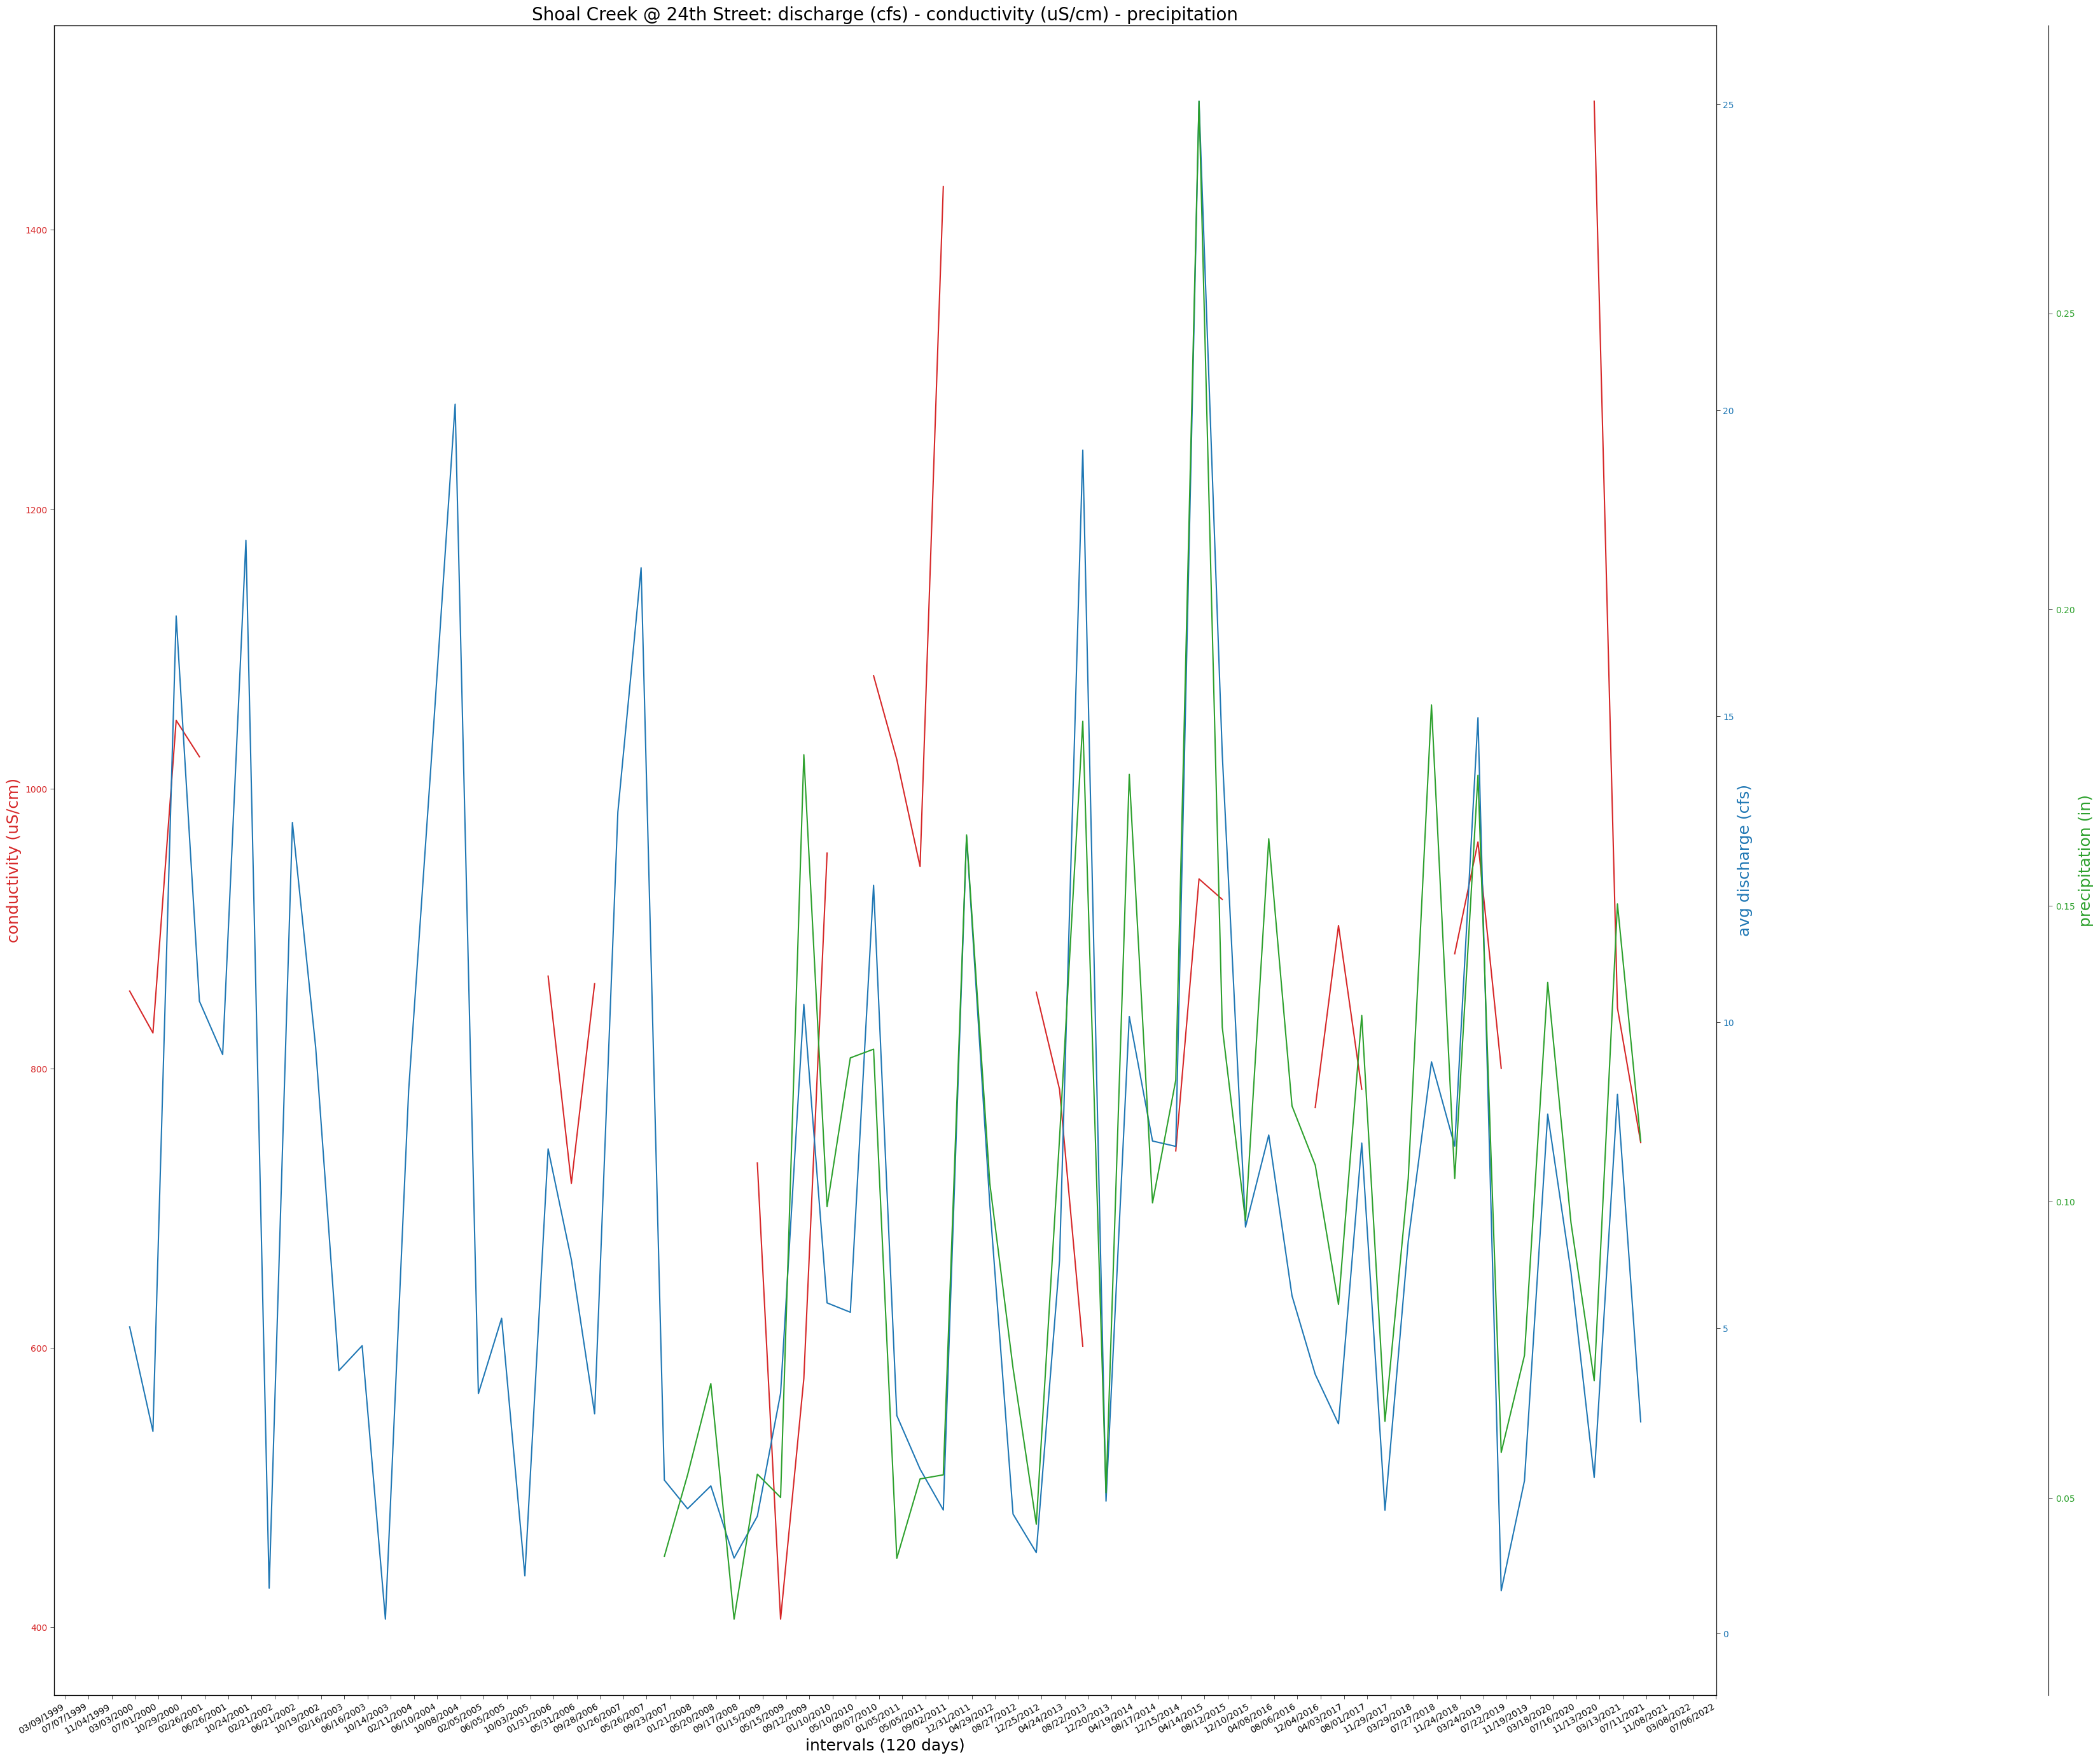

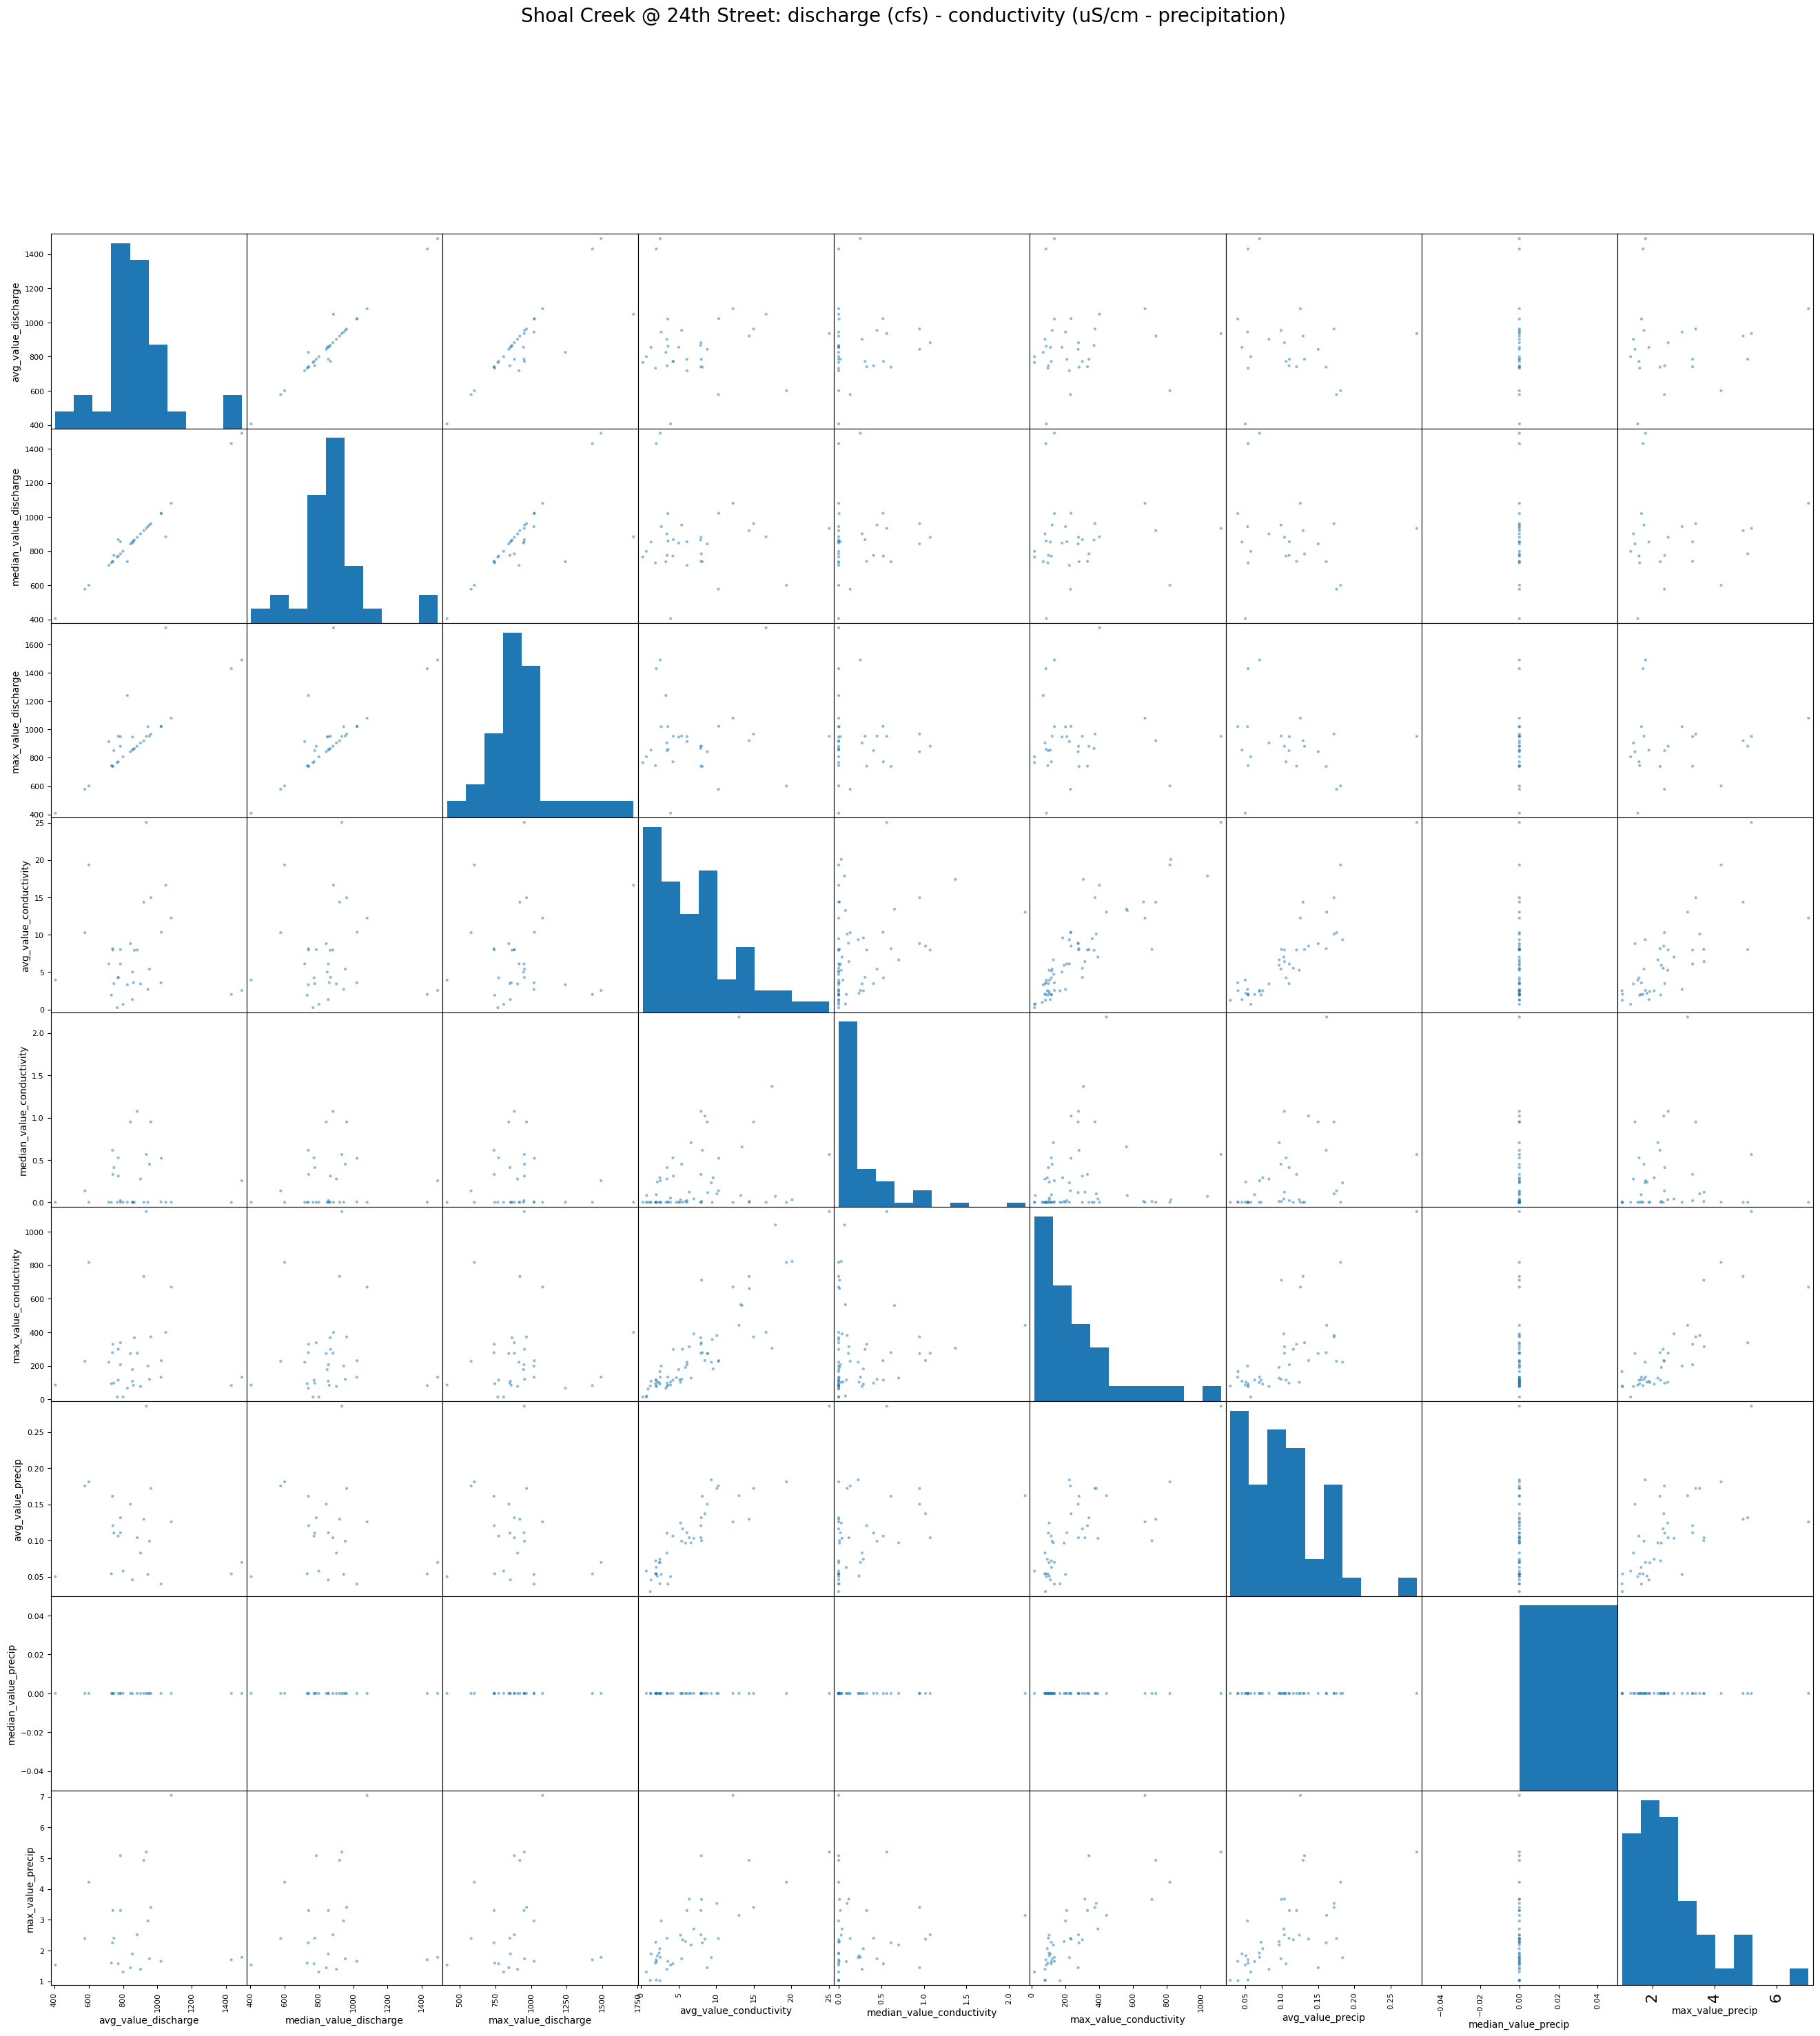

avg_value_discharge  median_value_discharge  \
avg_value_discharge                   1.000000                0.981858   
median_value_discharge                0.981858                1.000000   
max_value_discharge                   0.832519                0.750886   
avg_value_conductivity               -0.024431               -0.070106   
median_value_conductivity             0.054413                0.082141   
max_value_conductivity                0.012371                0.005451   
avg_value_precip                     -0.193430               -0.195597   
median_value_precip                        NaN                     NaN   
max_value_precip                      0.030977                0.033930   

                           max_value_discharge  avg_value_conductivity  \
avg_value_discharge                   0.832519               -0.024431   
median_value_discharge                0.750886               -0.070106   
max_value_discharge                   1.000000                0.050204   
avg_value_conductivity                0.050204                1.000000   
median_value_conductivity            -0.086712                0.324465   
max_value_conductivity                0.000683                0.875393   
avg_value_precip                     -0.197347                0.898562   
median_value_precip                        NaN                     NaN   
max_value_precip                      0.067646                0.716229   

                           median_value_conductivity  max_value_conductivity  \
avg_value_discharge                         0.054413                0.012371   
median_value_discharge                      0.082141                0.005451   
max_value_discharge                        -0.086712                0.000683   
avg_value_conductivity                      0.324465                0.875393   
median_value_conductivity                   1.000000                0.096485   
max_value_conductivity                      0.096485                1.000000   
avg_value_precip                            0.410344                0.714114   
median_value_precip                              NaN                     NaN   
max_value_precip                            0.015033                0.807955   

                           avg_value_precip  median_value_precip  \
avg_value_discharge               -0.193430                  NaN   
median_value_discharge            -0.195597                  NaN   
max_value_discharge               -0.197347                  NaN   
avg_value_conductivity             0.898562                  NaN   
median_value_conductivity          0.410344                  NaN   
max_value_conductivity             0.714114                  NaN   
avg_value_precip                   1.000000                  NaN   
median_value_precip                     NaN                  NaN   
max_value_precip                   0.574109                  NaN   

                           max_value_precip  
avg_value_discharge                0.030977  
median_value_discharge             0.033930  
max_value_discharge                0.067646  
avg_value_conductivity             0.716229  
median_value_conductivity          0.015033  
max_value_conductivity             0.807955  
avg_value_precip                   0.574109  
median_value_precip                     NaN  
max_value_precip                   1.000000

avg_value_discharge  median_value_discharge  max_value_discharge  \
count            78.000000               78.000000            78.000000   
mean            311.807841              296.737179           412.012821   
std             171.843176              174.298310           222.379312   
min             121.500000              121.000000           128.000000   
25%             182.250000              178.250000           212.000000   
50%             270.687500              253.750000           377.000000   
75%             365.468750              359.000000           549.750000   
max            1045.000000             1045.000000          1070.000000   

       avg_value_conductivity  median_value_conductivity  \
count              108.000000                 108.000000   
mean                 7.413549                   0.289861   
std                  6.036551                   0.763061   
min                  0.052174                   0.000000   
25%                  2.684813                   0.000000   
50%                  5.902500                   0.000000   
75%                 10.482375                   0.233750   
max                 29.229083                   6.250000   

       max_value_conductivity  avg_value_precip  median_value_precip  \
count              108.000000         33.000000            33.000000   
mean               268.032407          0.101854             0.000152   
std                243.662935          0.056423             0.000870   
min                  4.800000          0.022818             0.000000   
25%                104.000000          0.053125             0.000000   
50%                194.000000          0.102162             0.000000   
75%                322.250000          0.129135             0.000000   
max               1120.000000          0.290909             0.005000   

       max_value_precip  
count         33.000000  
mean           2.673030  
std            1.401436  
min            1.020000  
25%            1.640000  
50%            2.390000  
75%            3.300000  
max            7.040000

avg_value_discharge  median_value_discharge  max_value_discharge  \
start_date                                                                     
2018-02-05               153.25                   145.5                190.0   
2017-10-08               173.50                   173.5                189.0   
2017-06-10               180.50                   180.5                181.0   
2017-02-10                  NaN                     NaN                  NaN   
2016-10-13                  NaN                     NaN                  NaN   
2016-06-15                  NaN                     NaN                  NaN   
2016-02-16               176.00                   176.0                193.0   
2015-10-19               217.25                   214.0                279.0   
2015-06-21                  NaN                     NaN                  NaN   
2015-02-21                  NaN                     NaN                  NaN   

            avg_value_conductivity  median_value_conductivity  \
start_date                                                      
2018-02-05                6.632000                       0.14   
2017-10-08                1.871917                       0.08   
2017-06-10                8.736167                       0.00   
2017-02-10                3.491250                       0.66   
2016-10-13                3.703333                       0.09   
2016-06-15                5.592583                       0.00   
2016-02-16                9.551583                       0.71   
2015-10-19               18.560750                       1.20   
2015-06-21                1.161750                       0.00   
2015-02-21               26.496750                       0.55   

            max_value_conductivity  avg_value_precip  median_value_precip  \
start_date                                                                  
2018-02-05                   314.0          0.115000                0.000   
2017-10-08                   116.0          0.055047                0.000   
2017-06-10                   338.0          0.135093                0.000   
2017-02-10                    61.0          0.100288                0.000   
2016-10-13                   115.0          0.094952                0.000   
2016-06-15                   299.0          0.100088                0.000   
2016-02-16                   279.0          0.196147                0.000   
2015-10-19                   734.0          0.176822                0.000   
2015-06-21                    42.5          0.035804                0.000   
2015-02-21                  1120.0          0.290909                0.005   

            max_value_precip  
start_date                    
2018-02-05              3.67  
2017-10-08              1.64  
2017-06-10              5.08  
2017-02-10              1.39  
2016-10-13              1.57  
2016-06-15              2.35  
2016-02-16              2.25  
2015-10-19              4.93  
2015-06-21              1.05  
2015-02-21              5.20

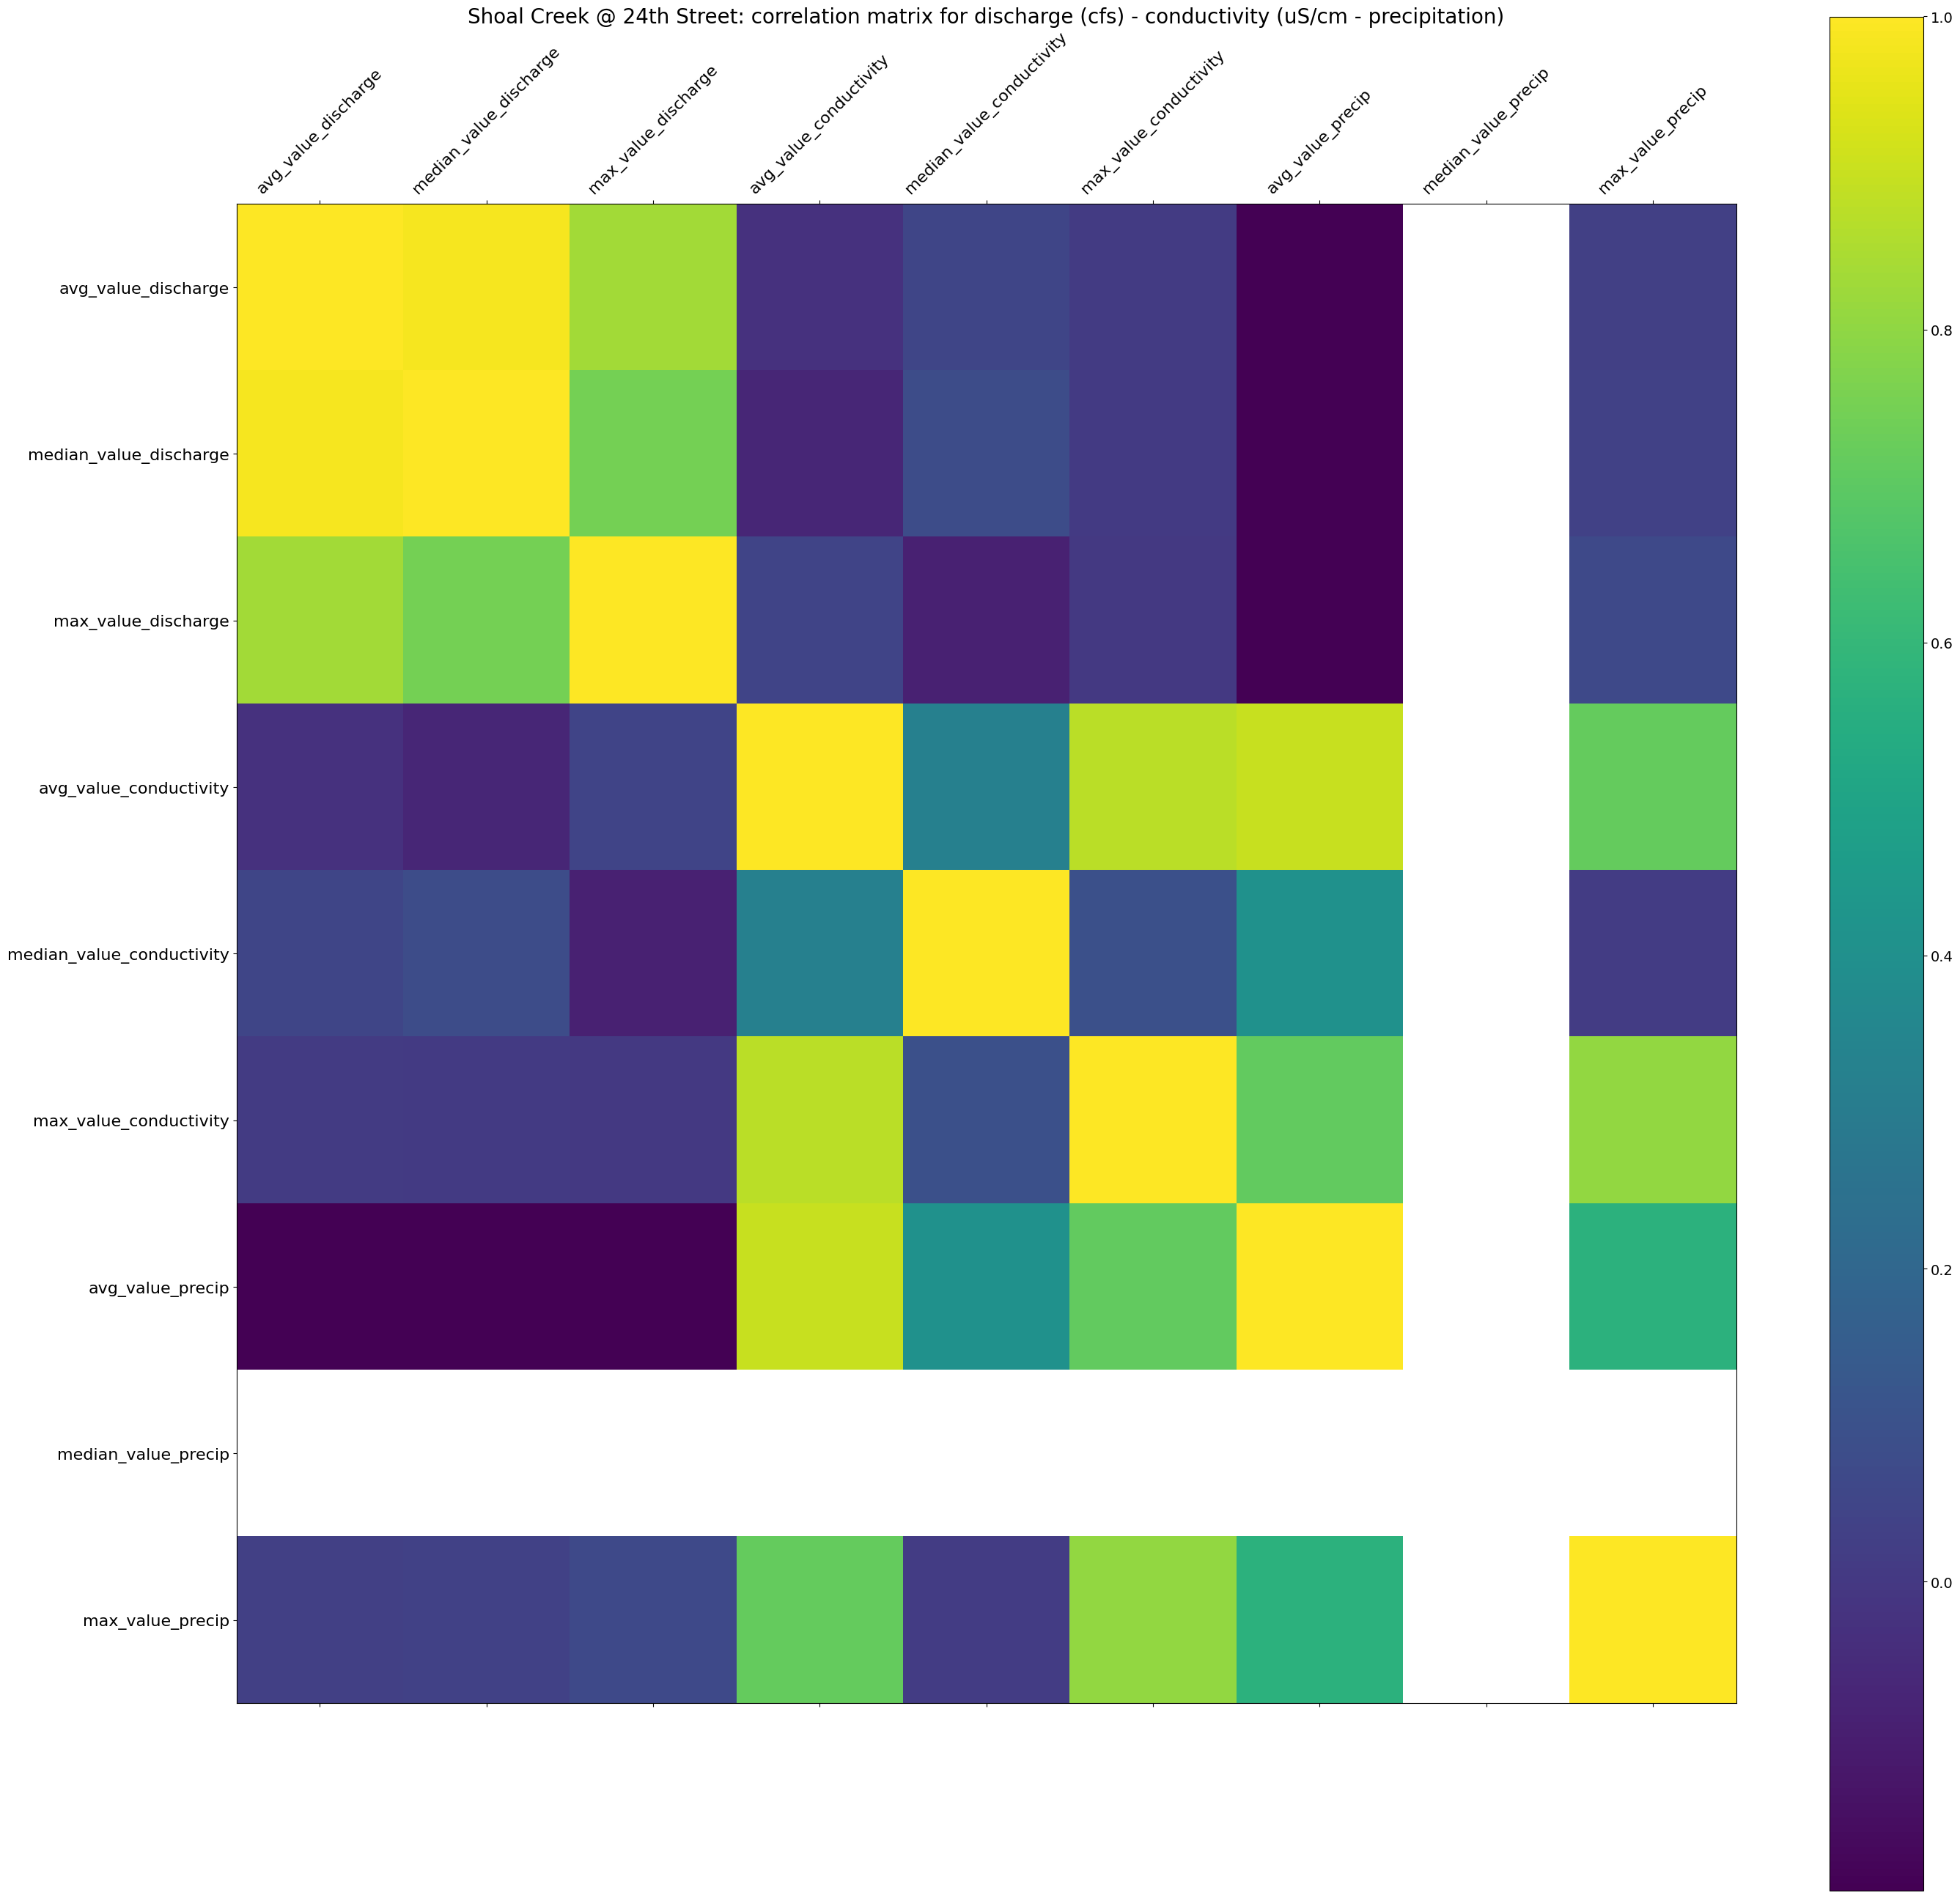

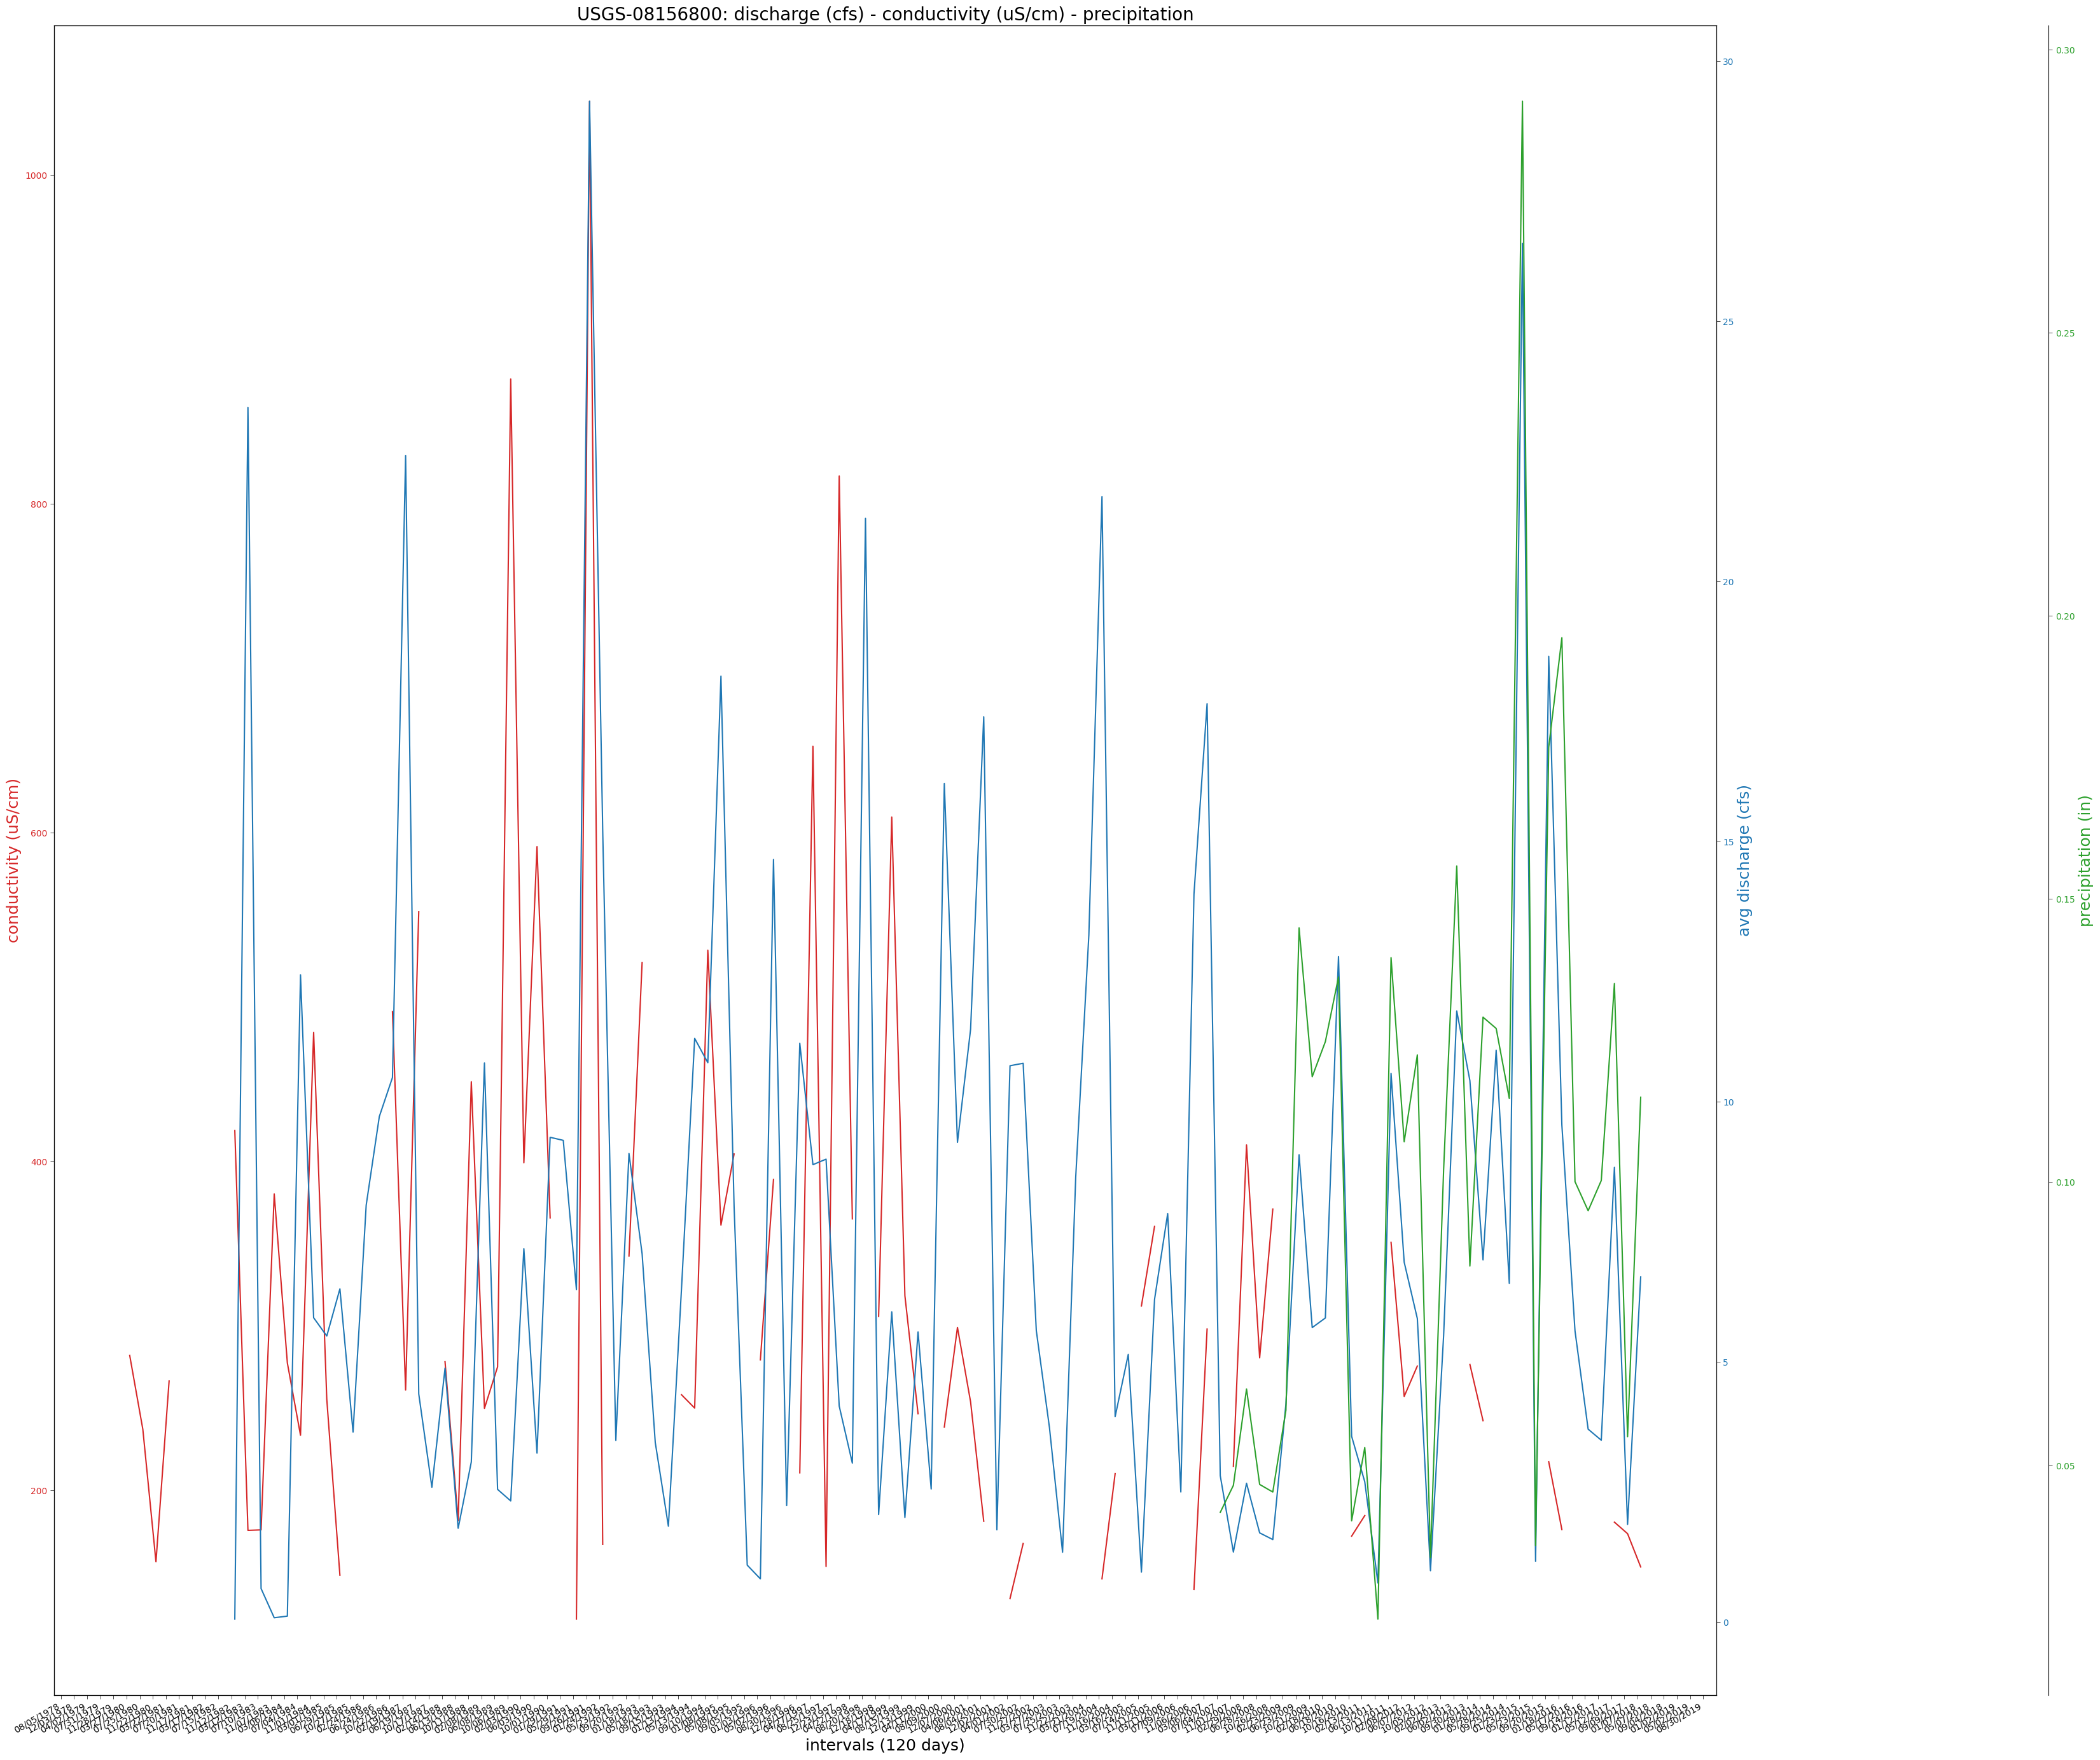

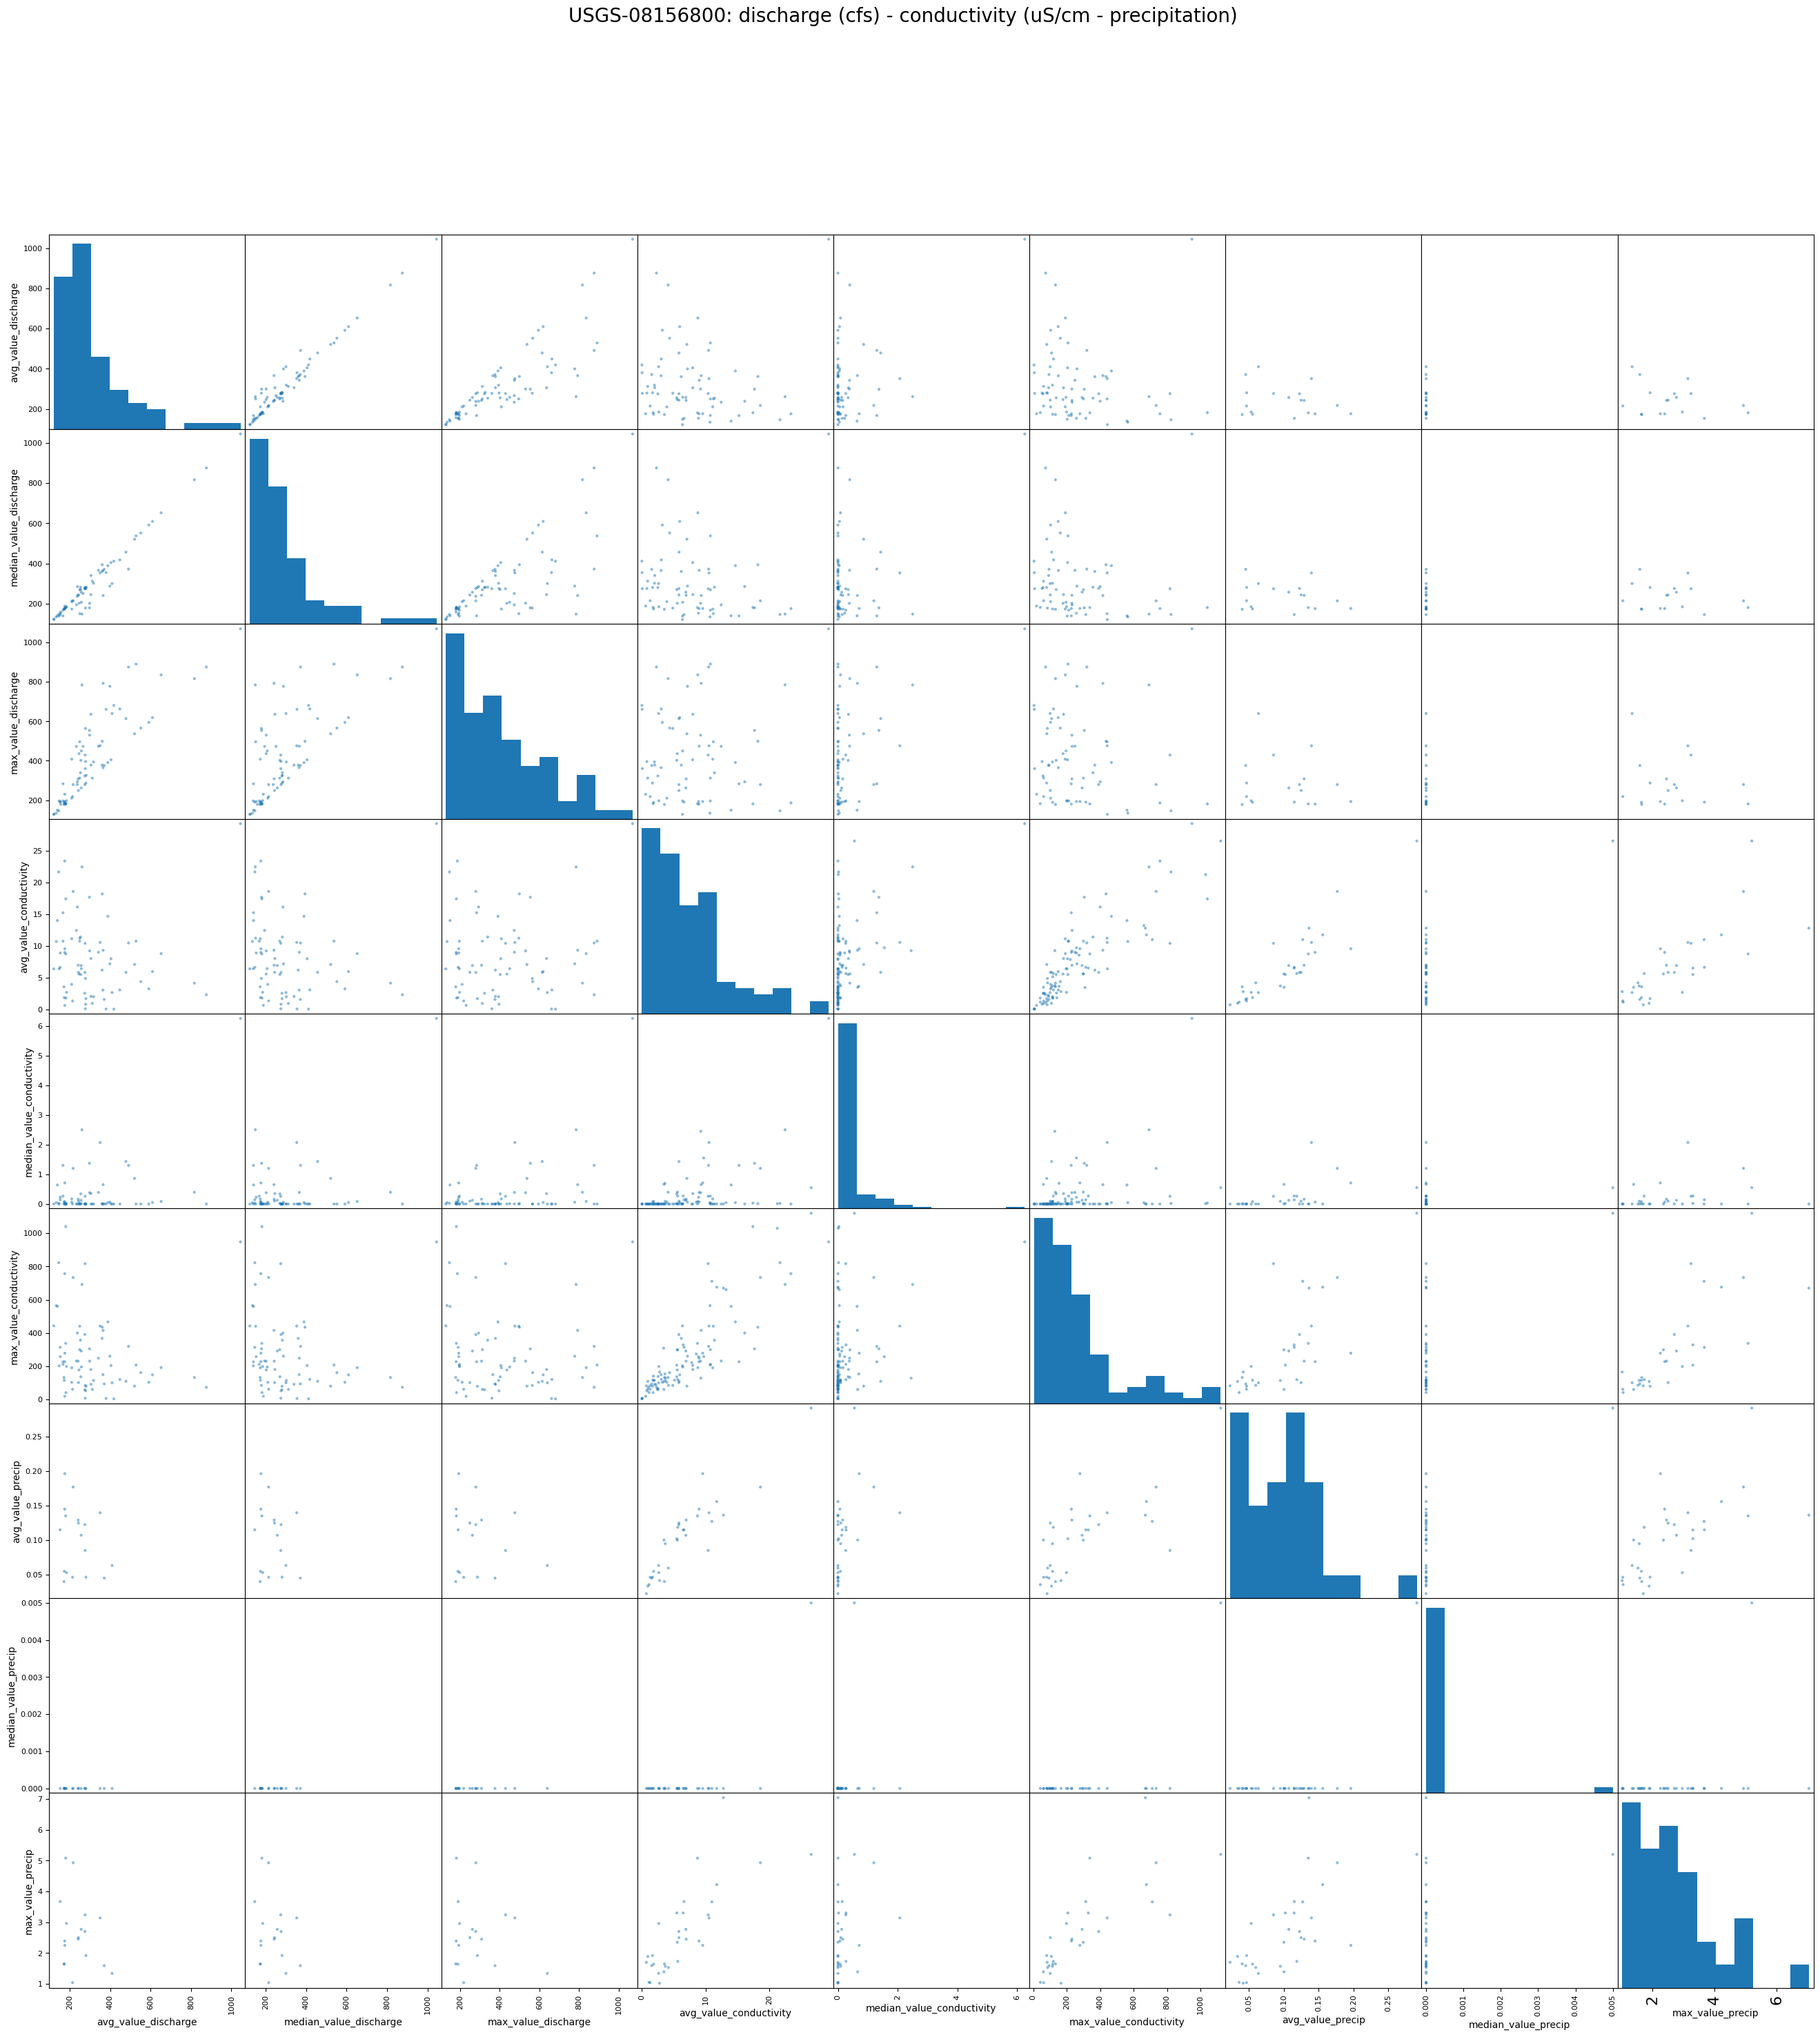

avg_value_discharge  median_value_discharge  \
avg_value_discharge                   1.000000                0.975291   
median_value_discharge                0.975291                1.000000   
max_value_discharge                   0.836225                0.724116   
avg_value_conductivity                0.010417               -0.012368   
median_value_conductivity             0.422107                0.376415   
max_value_conductivity               -0.075925               -0.078923   
avg_value_precip                     -0.223291               -0.184373   
median_value_precip                        NaN                     NaN   
max_value_precip                     -0.278468               -0.219256   

                           max_value_discharge  avg_value_conductivity  \
avg_value_discharge                   0.836225                0.010417   
median_value_discharge                0.724116               -0.012368   
max_value_discharge                   1.000000                0.085424   
avg_value_conductivity                0.085424                1.000000   
median_value_conductivity             0.420265                0.487592   
max_value_conductivity               -0.061631                0.857501   
avg_value_precip                     -0.133175                0.906605   
median_value_precip                        NaN                0.656954   
max_value_precip                     -0.169511                0.775097   

                           median_value_conductivity  max_value_conductivity  \
avg_value_discharge                         0.422107               -0.075925   
median_value_discharge                      0.376415               -0.078923   
max_value_discharge                         0.420265               -0.061631   
avg_value_conductivity                      0.487592                0.857501   
median_value_conductivity                   1.000000                0.304256   
max_value_conductivity                      0.304256                1.000000   
avg_value_precip                            0.450729                0.731895   
median_value_precip                         0.144482                0.557031   
max_value_precip                            0.202414                0.793731   

                           avg_value_precip  median_value_precip  \
avg_value_discharge               -0.223291                  NaN   
median_value_discharge            -0.184373                  NaN   
max_value_discharge               -0.133175                  NaN   
avg_value_conductivity             0.906605             0.656954   
median_value_conductivity          0.450729             0.144482   
max_value_conductivity             0.731895             0.557031   
avg_value_precip                   1.000000             0.601510   
median_value_precip                0.601510             1.000000   
max_value_precip                   0.662194             0.323693   

                           max_value_precip  
avg_value_discharge               -0.278468  
median_value_discharge            -0.219256  
max_value_discharge               -0.169511  
avg_value_conductivity             0.775097  
median_value_conductivity          0.202414  
max_value_conductivity             0.793731  
avg_value_precip                   0.662194  
median_value_precip                0.323693  
max_value_precip                   1.000000

avg_value_discharge  median_value_discharge  max_value_discharge  \
count            42.000000               42.000000            42.000000   
mean            712.861706              717.942857           777.269048   
std             122.530100              122.702864           154.073510   
min             371.000000              371.000000           507.000000   
25%             634.750000              634.750000           678.750000   
50%             721.358333              722.825000           777.200000   
75%             785.650000              809.950000           868.875000   
max             999.000000              999.000000          1220.000000   

       avg_value_conductivity  median_value_conductivity  \
count               83.000000                  83.000000   
mean                 7.431811                   0.191145   
std                  5.516345                   0.341622   
min                  0.034417                   0.000000   
25%                  3.180292                   0.000000   
50%                  6.015583                   0.005000   
75%                 10.454417                   0.217500   
max                 24.345417                   1.445000   

       max_value_conductivity  avg_value_precip  median_value_precip  \
count               83.000000         43.000000                 43.0   
mean               272.543373          0.105885                  0.0   
std                242.028695          0.054065                  0.0   
min                  2.000000          0.025841                  0.0   
25%                115.000000          0.068698                  0.0   
50%                194.000000          0.093465                  0.0   
75%                347.500000          0.136546                  0.0   
max               1120.000000          0.259727                  0.0   

       max_value_precip  
count         43.000000  
mean           2.530698  
std            1.291659  
min            0.630000  
25%            1.650000  
50%            2.250000  
75%            3.210000  
max            7.040000

avg_value_discharge  median_value_discharge  max_value_discharge  \
start_date                                                                     
2021-07-14               653.75                  653.75                692.5   
2021-03-16               586.85                  586.85                606.7   
2020-11-16               801.00                  801.00                801.0   
2020-07-19                  NaN                     NaN                  NaN   
2020-03-21                  NaN                     NaN                  NaN   
2019-11-22                  NaN                     NaN                  NaN   
2019-07-25               659.00                  659.00                678.0   
2019-03-27               781.00                  781.00                834.0   
2018-11-27               850.00                  850.00                850.0   
2018-07-30                  NaN                     NaN                  NaN   

            avg_value_conductivity  median_value_conductivity  \
start_date                                                      
2021-07-14                6.383083                      0.380   
2021-03-16                9.061833                      0.960   
2020-11-16                3.141250                      0.600   
2020-07-19                4.468333                      0.000   
2020-03-21                8.344083                      0.755   
2019-11-22                2.940833                      0.445   
2019-07-25                1.292167                      0.000   
2019-03-27               15.457917                      1.235   
2018-11-27                7.469167                      0.630   
2018-07-30                7.608083                      1.060   

            max_value_conductivity  avg_value_precip  median_value_precip  \
start_date                                                                  
2021-07-14                   161.0          0.115138                  0.0   
2021-03-16                   274.0          0.180952                  0.0   
2020-11-16                   133.0          0.081321                  0.0   
2020-07-19                   191.0          0.075321                  0.0   
2020-03-21                   232.0          0.135963                  0.0   
2019-11-22                   106.0          0.075963                  0.0   
2019-07-25                    82.7          0.062963                  0.0   
2019-03-27                   373.0          0.185283                  0.0   
2018-11-27                   276.0          0.091429                  0.0   
2018-07-30                   222.0          0.169048                  0.0   

            max_value_precip  
start_date                    
2021-07-14              2.45  
2021-03-16              1.44  
2020-11-16              1.78  
2020-07-19              2.29  
2020-03-21              2.37  
2019-11-22              1.43  
2019-07-25              2.06  
2019-03-27              3.40  
2018-11-27              2.51  
2018-07-30              1.65

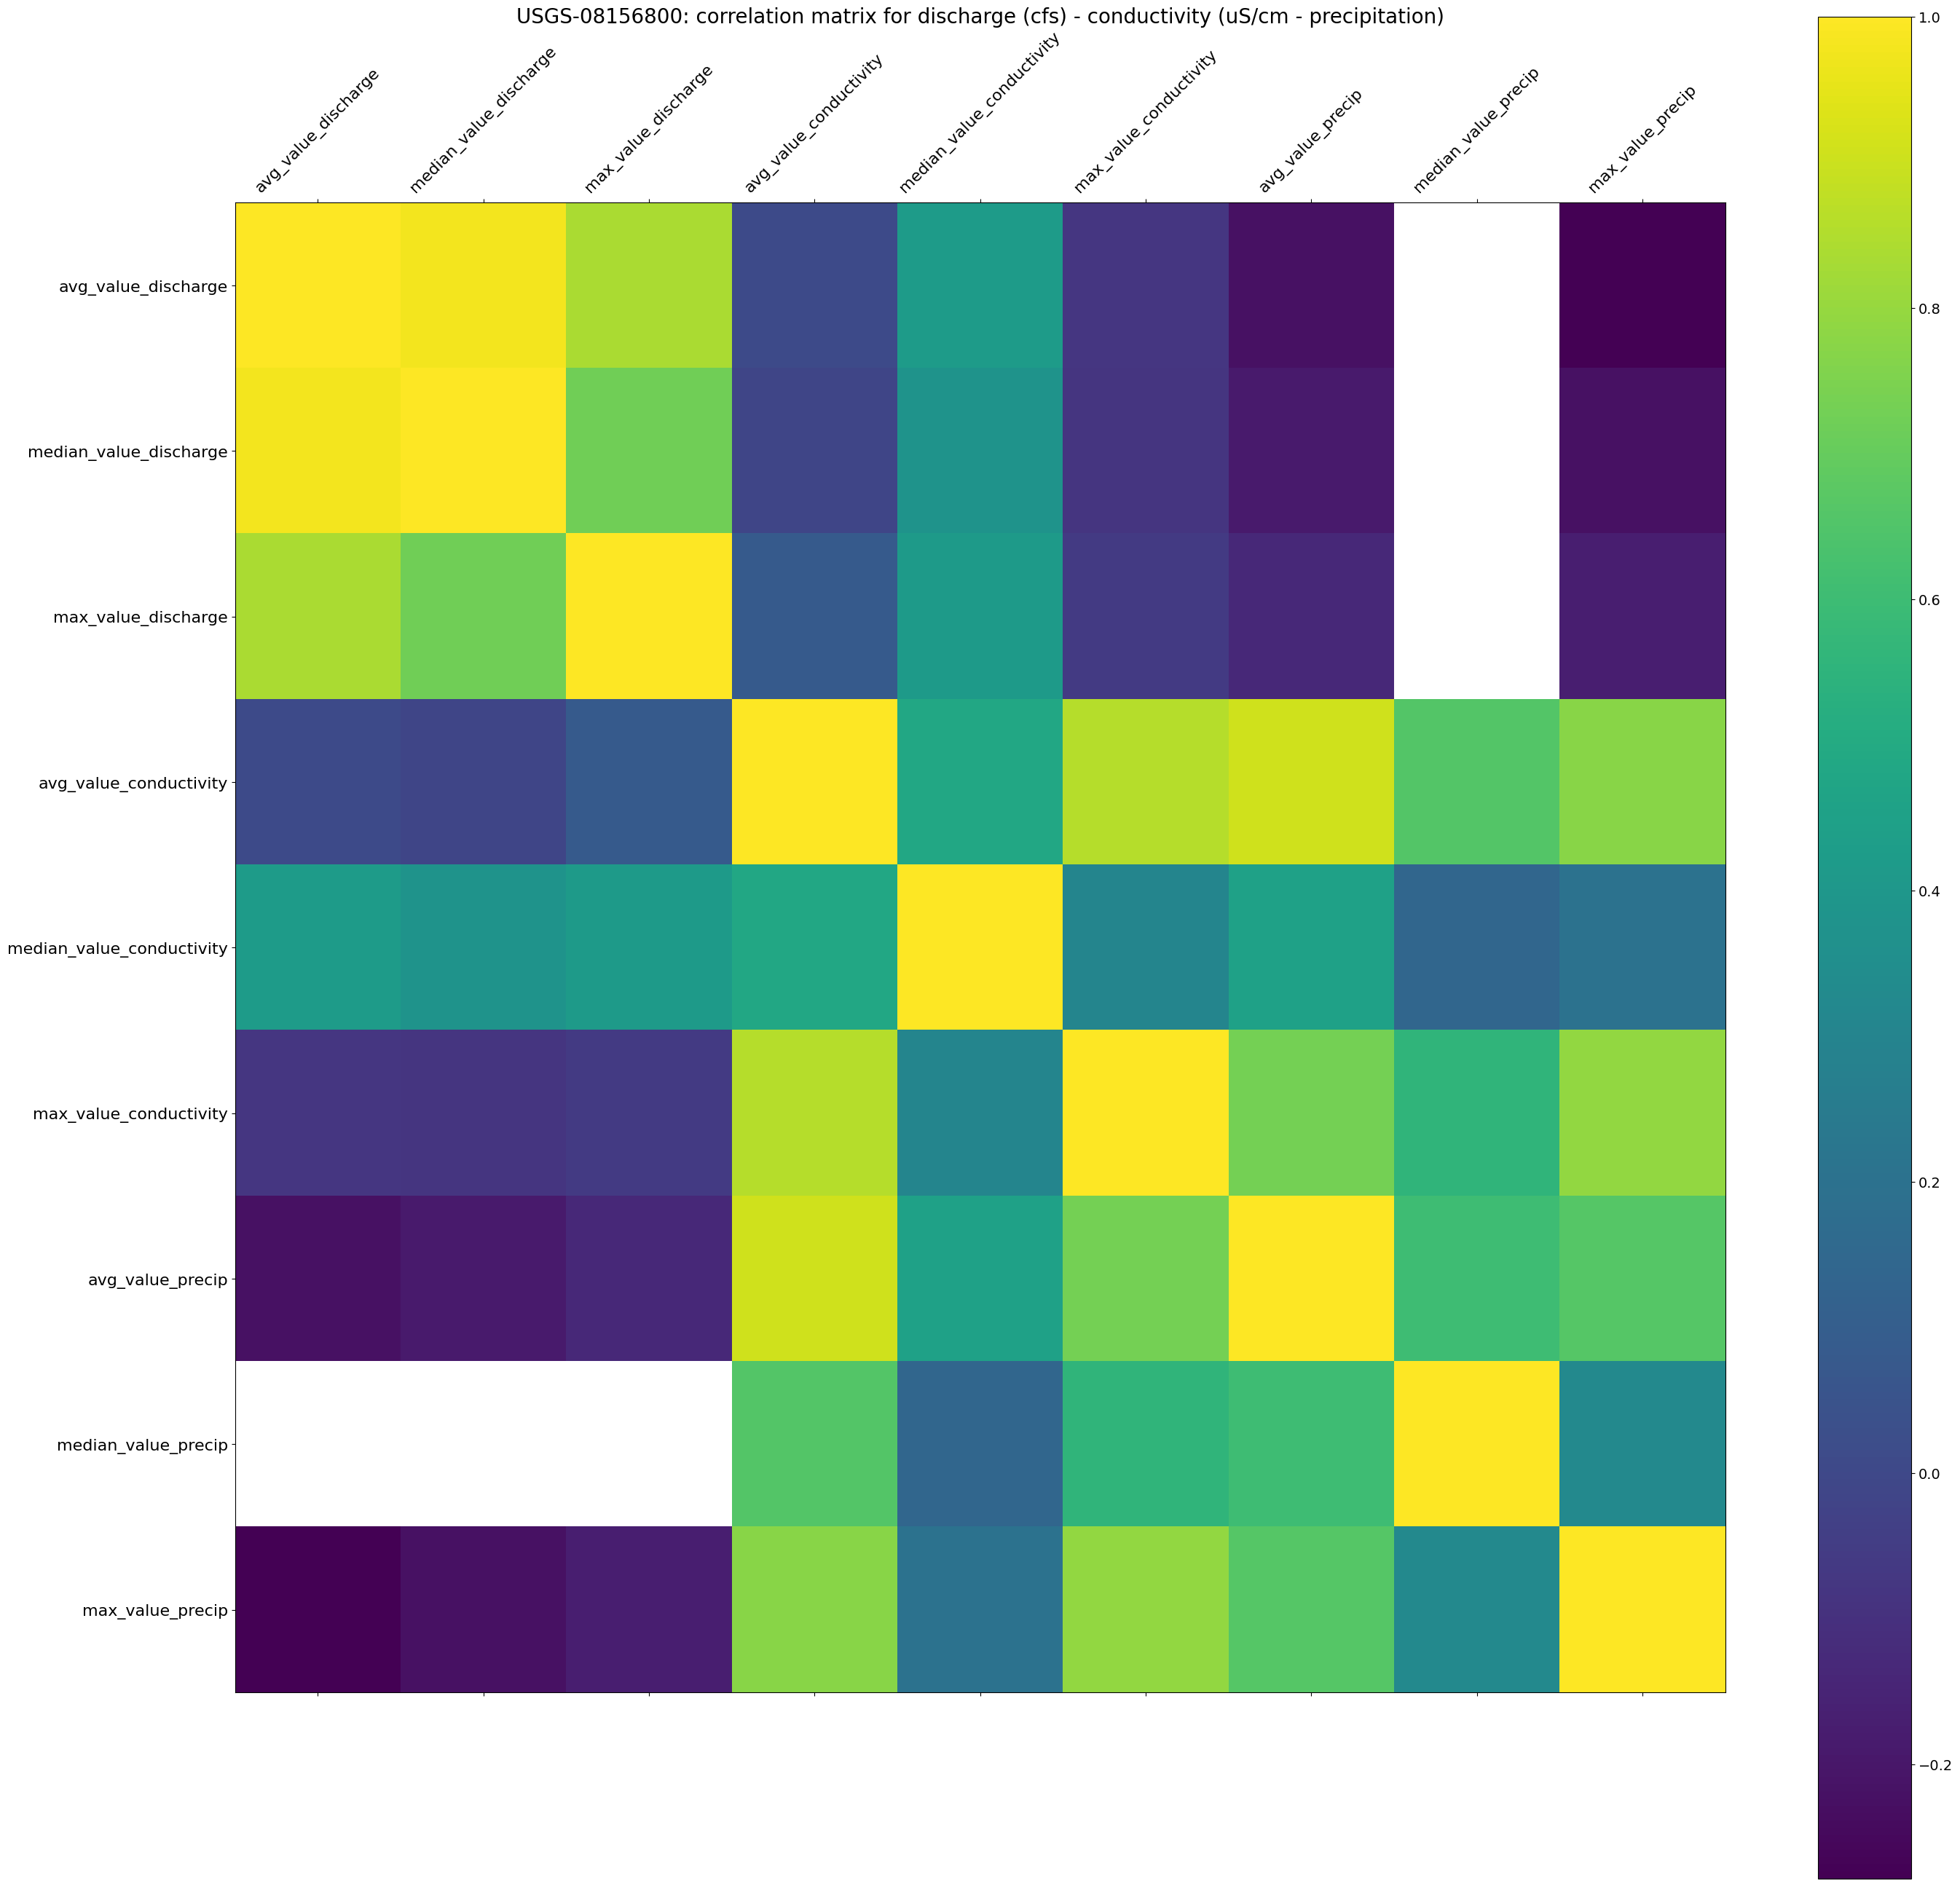

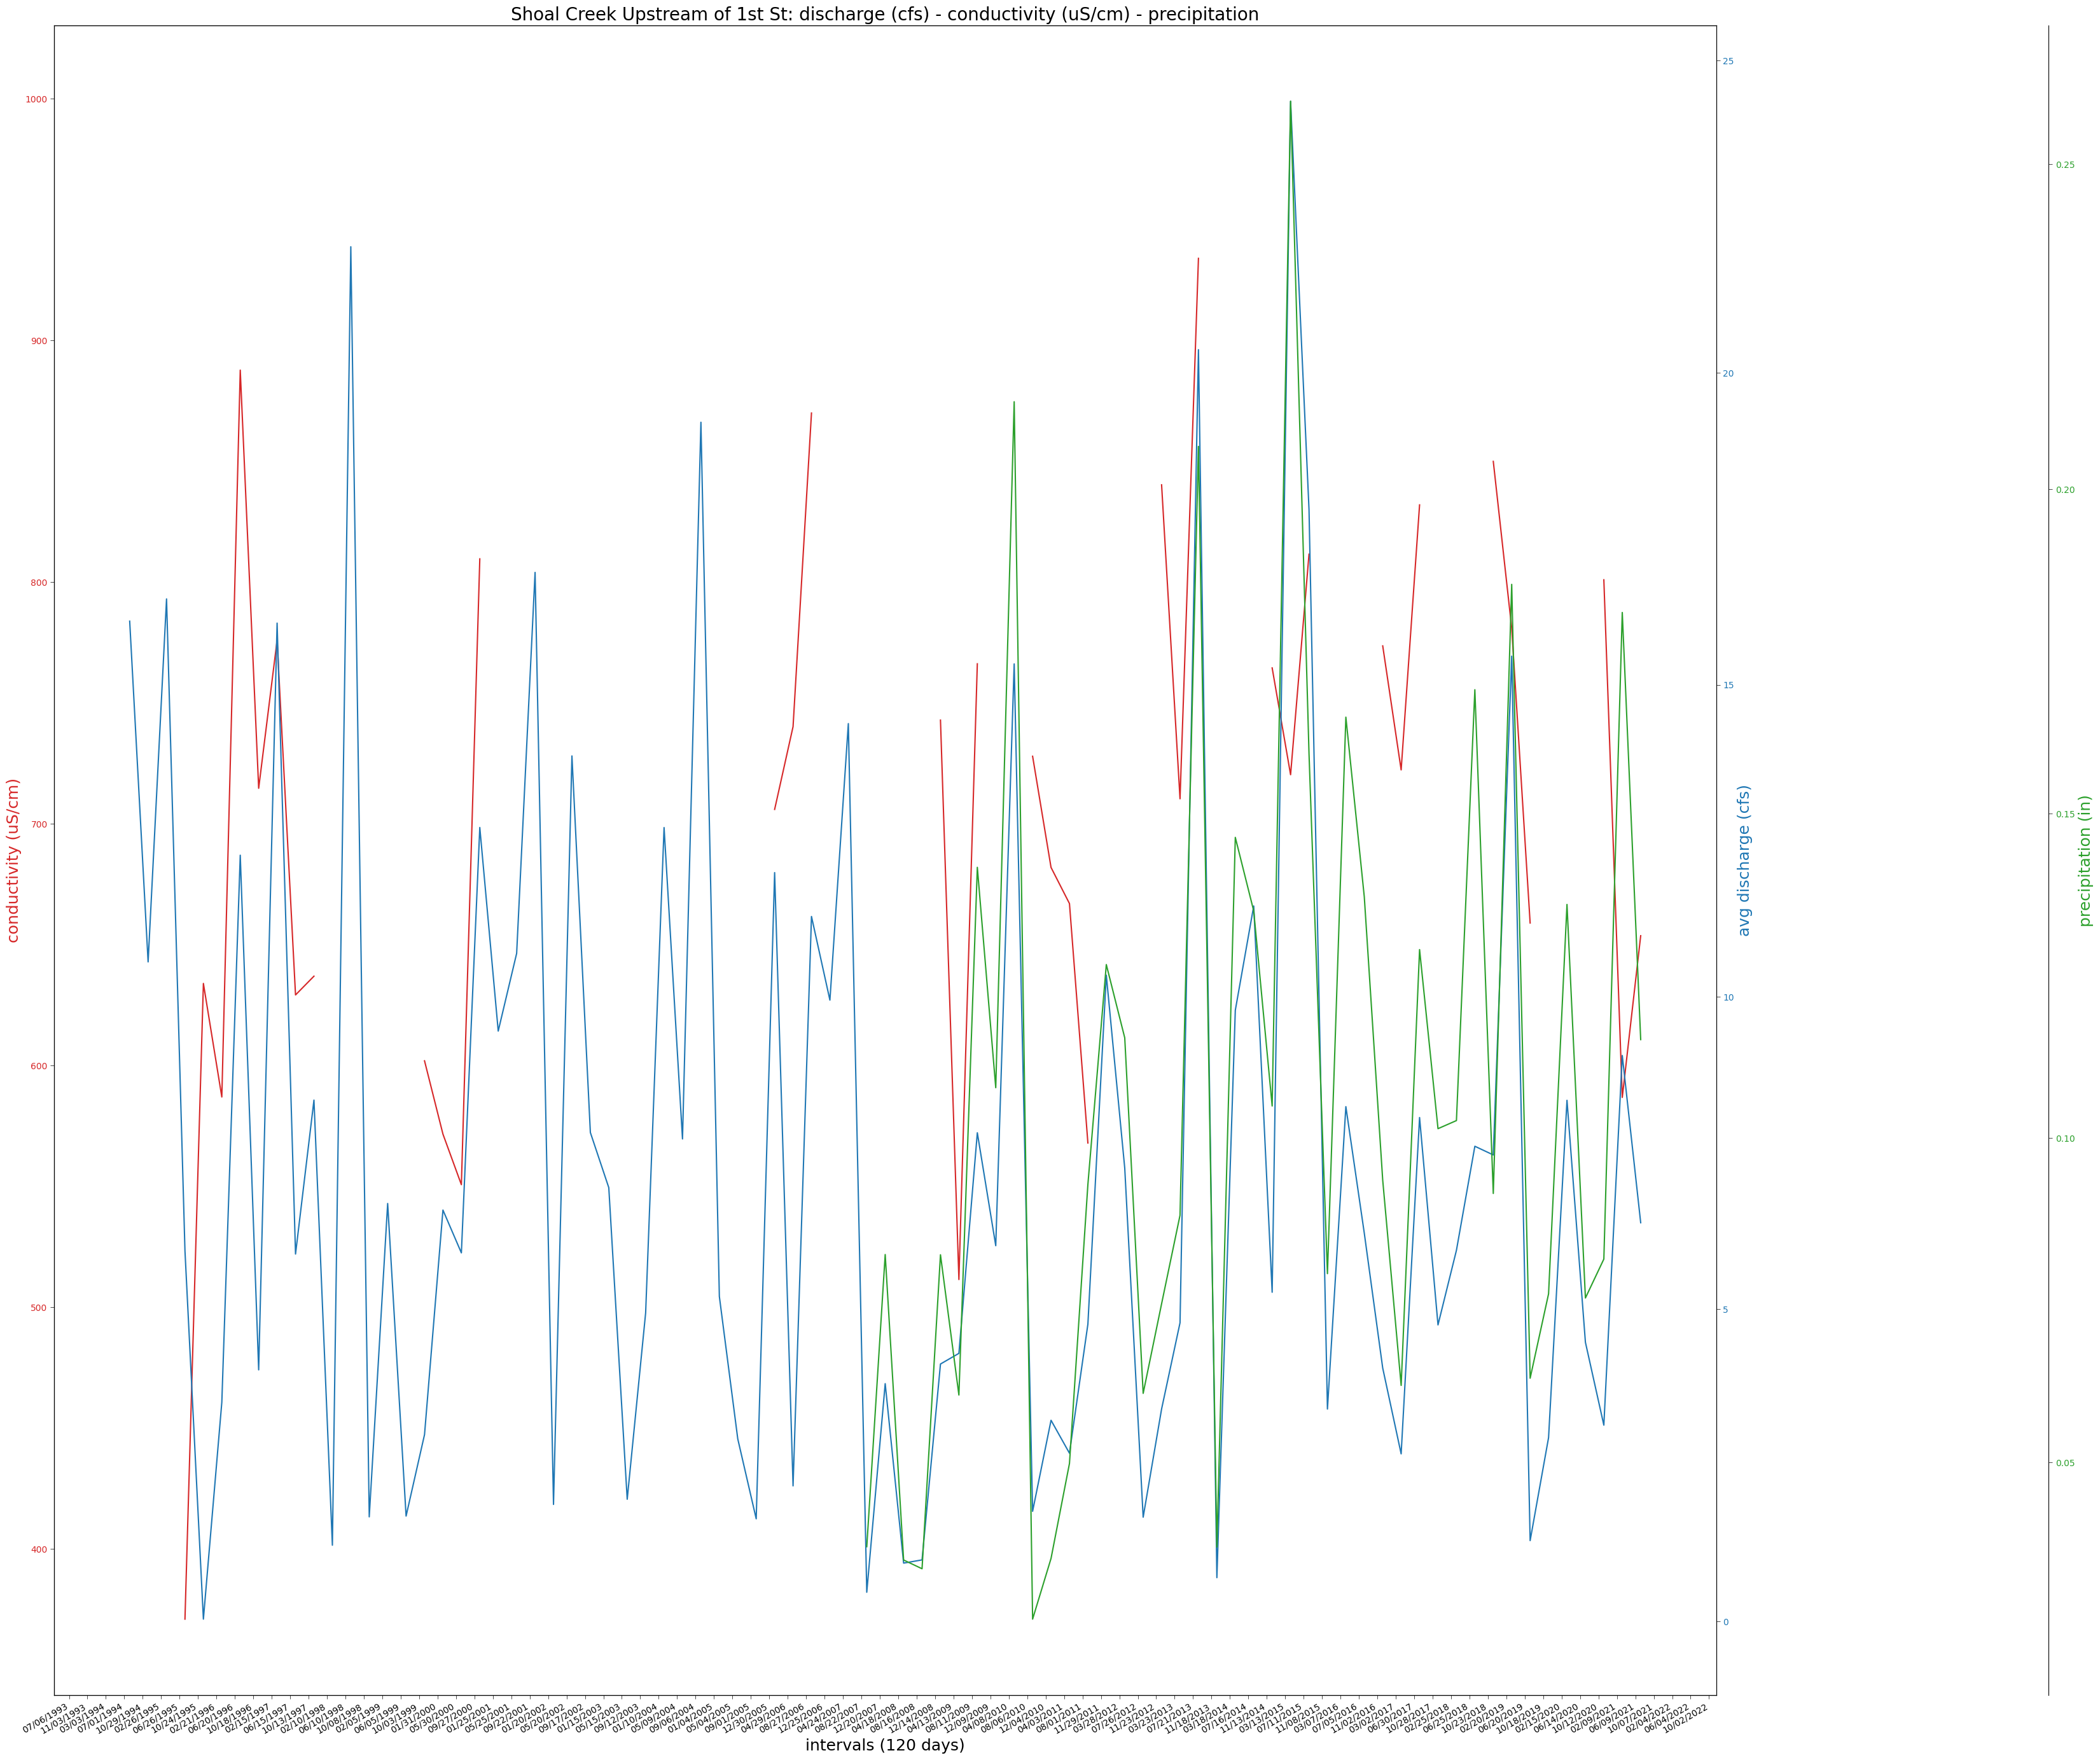

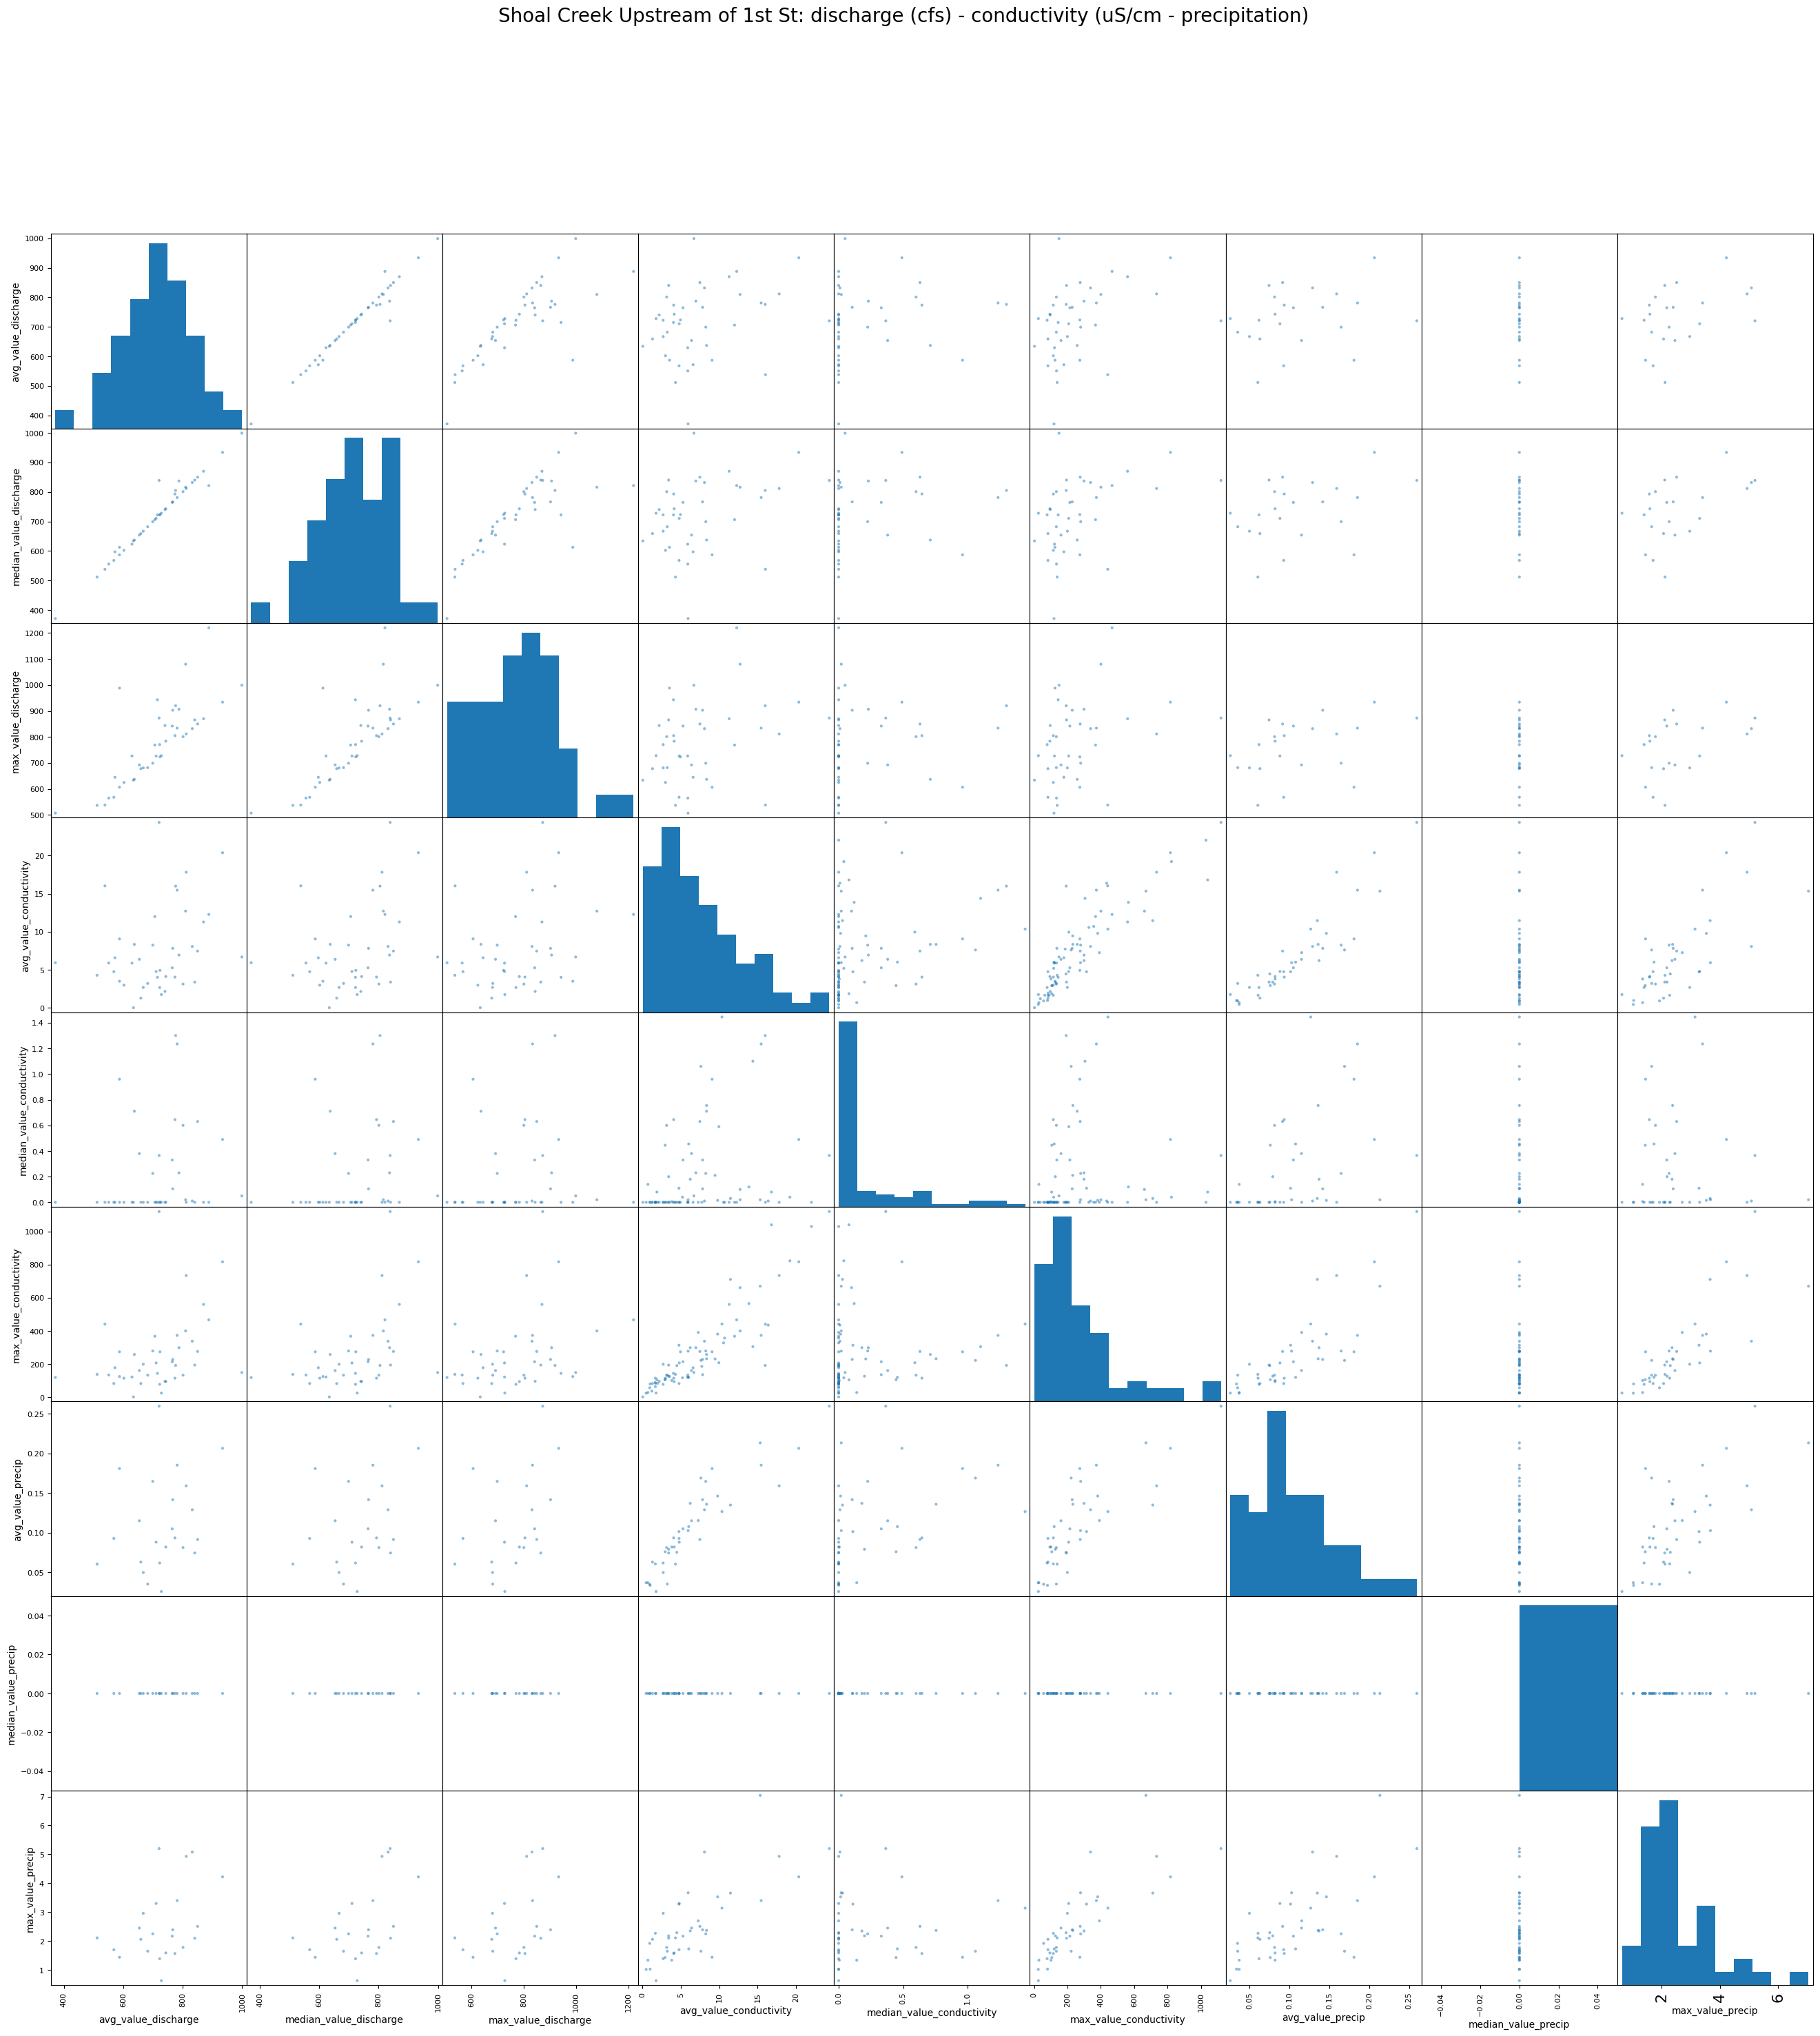

avg_value_discharge  median_value_discharge  \
avg_value_discharge                   1.000000                0.981736   
median_value_discharge                0.981736                1.000000   
max_value_discharge                   0.790081                0.785849   
avg_value_conductivity                0.284768                0.346907   
median_value_conductivity             0.179564                0.215421   
max_value_conductivity                0.357508                0.430312   
avg_value_precip                      0.257872                0.382723   
median_value_precip                        NaN                     NaN   
max_value_precip                      0.403343                0.497494   

                           max_value_discharge  avg_value_conductivity  \
avg_value_discharge                   0.790081                0.284768   
median_value_discharge                0.785849                0.346907   
max_value_discharge                   1.000000                0.310292   
avg_value_conductivity                0.310292                1.000000   
median_value_conductivity             0.097814                0.273807   
max_value_conductivity                0.337700                0.888606   
avg_value_precip                      0.409843                0.912226   
median_value_precip                        NaN                     NaN   
max_value_precip                      0.449954                0.759333   

                           median_value_conductivity  max_value_conductivity  \
avg_value_discharge                         0.179564                0.357508   
median_value_discharge                      0.215421                0.430312   
max_value_discharge                         0.097814                0.337700   
avg_value_conductivity                      0.273807                0.888606   
median_value_conductivity                   1.000000                0.060463   
max_value_conductivity                      0.060463                1.000000   
avg_value_precip                            0.430321                0.819424   
median_value_precip                              NaN                     NaN   
max_value_precip                           -0.025476                0.817119   

                           avg_value_precip  median_value_precip  \
avg_value_discharge                0.257872                  NaN   
median_value_discharge             0.382723                  NaN   
max_value_discharge                0.409843                  NaN   
avg_value_conductivity             0.912226                  NaN   
median_value_conductivity          0.430321                  NaN   
max_value_conductivity             0.819424                  NaN   
avg_value_precip                   1.000000                  NaN   
median_value_precip                     NaN                  NaN   
max_value_precip                   0.682645                  NaN   

                           max_value_precip  
avg_value_discharge                0.403343  
median_value_discharge             0.497494  
max_value_discharge                0.449954  
avg_value_conductivity             0.759333  
median_value_conductivity         -0.025476  
max_value_conductivity             0.817119  
avg_value_precip                   0.682645  
median_value_precip                     NaN  
max_value_precip                   1.000000

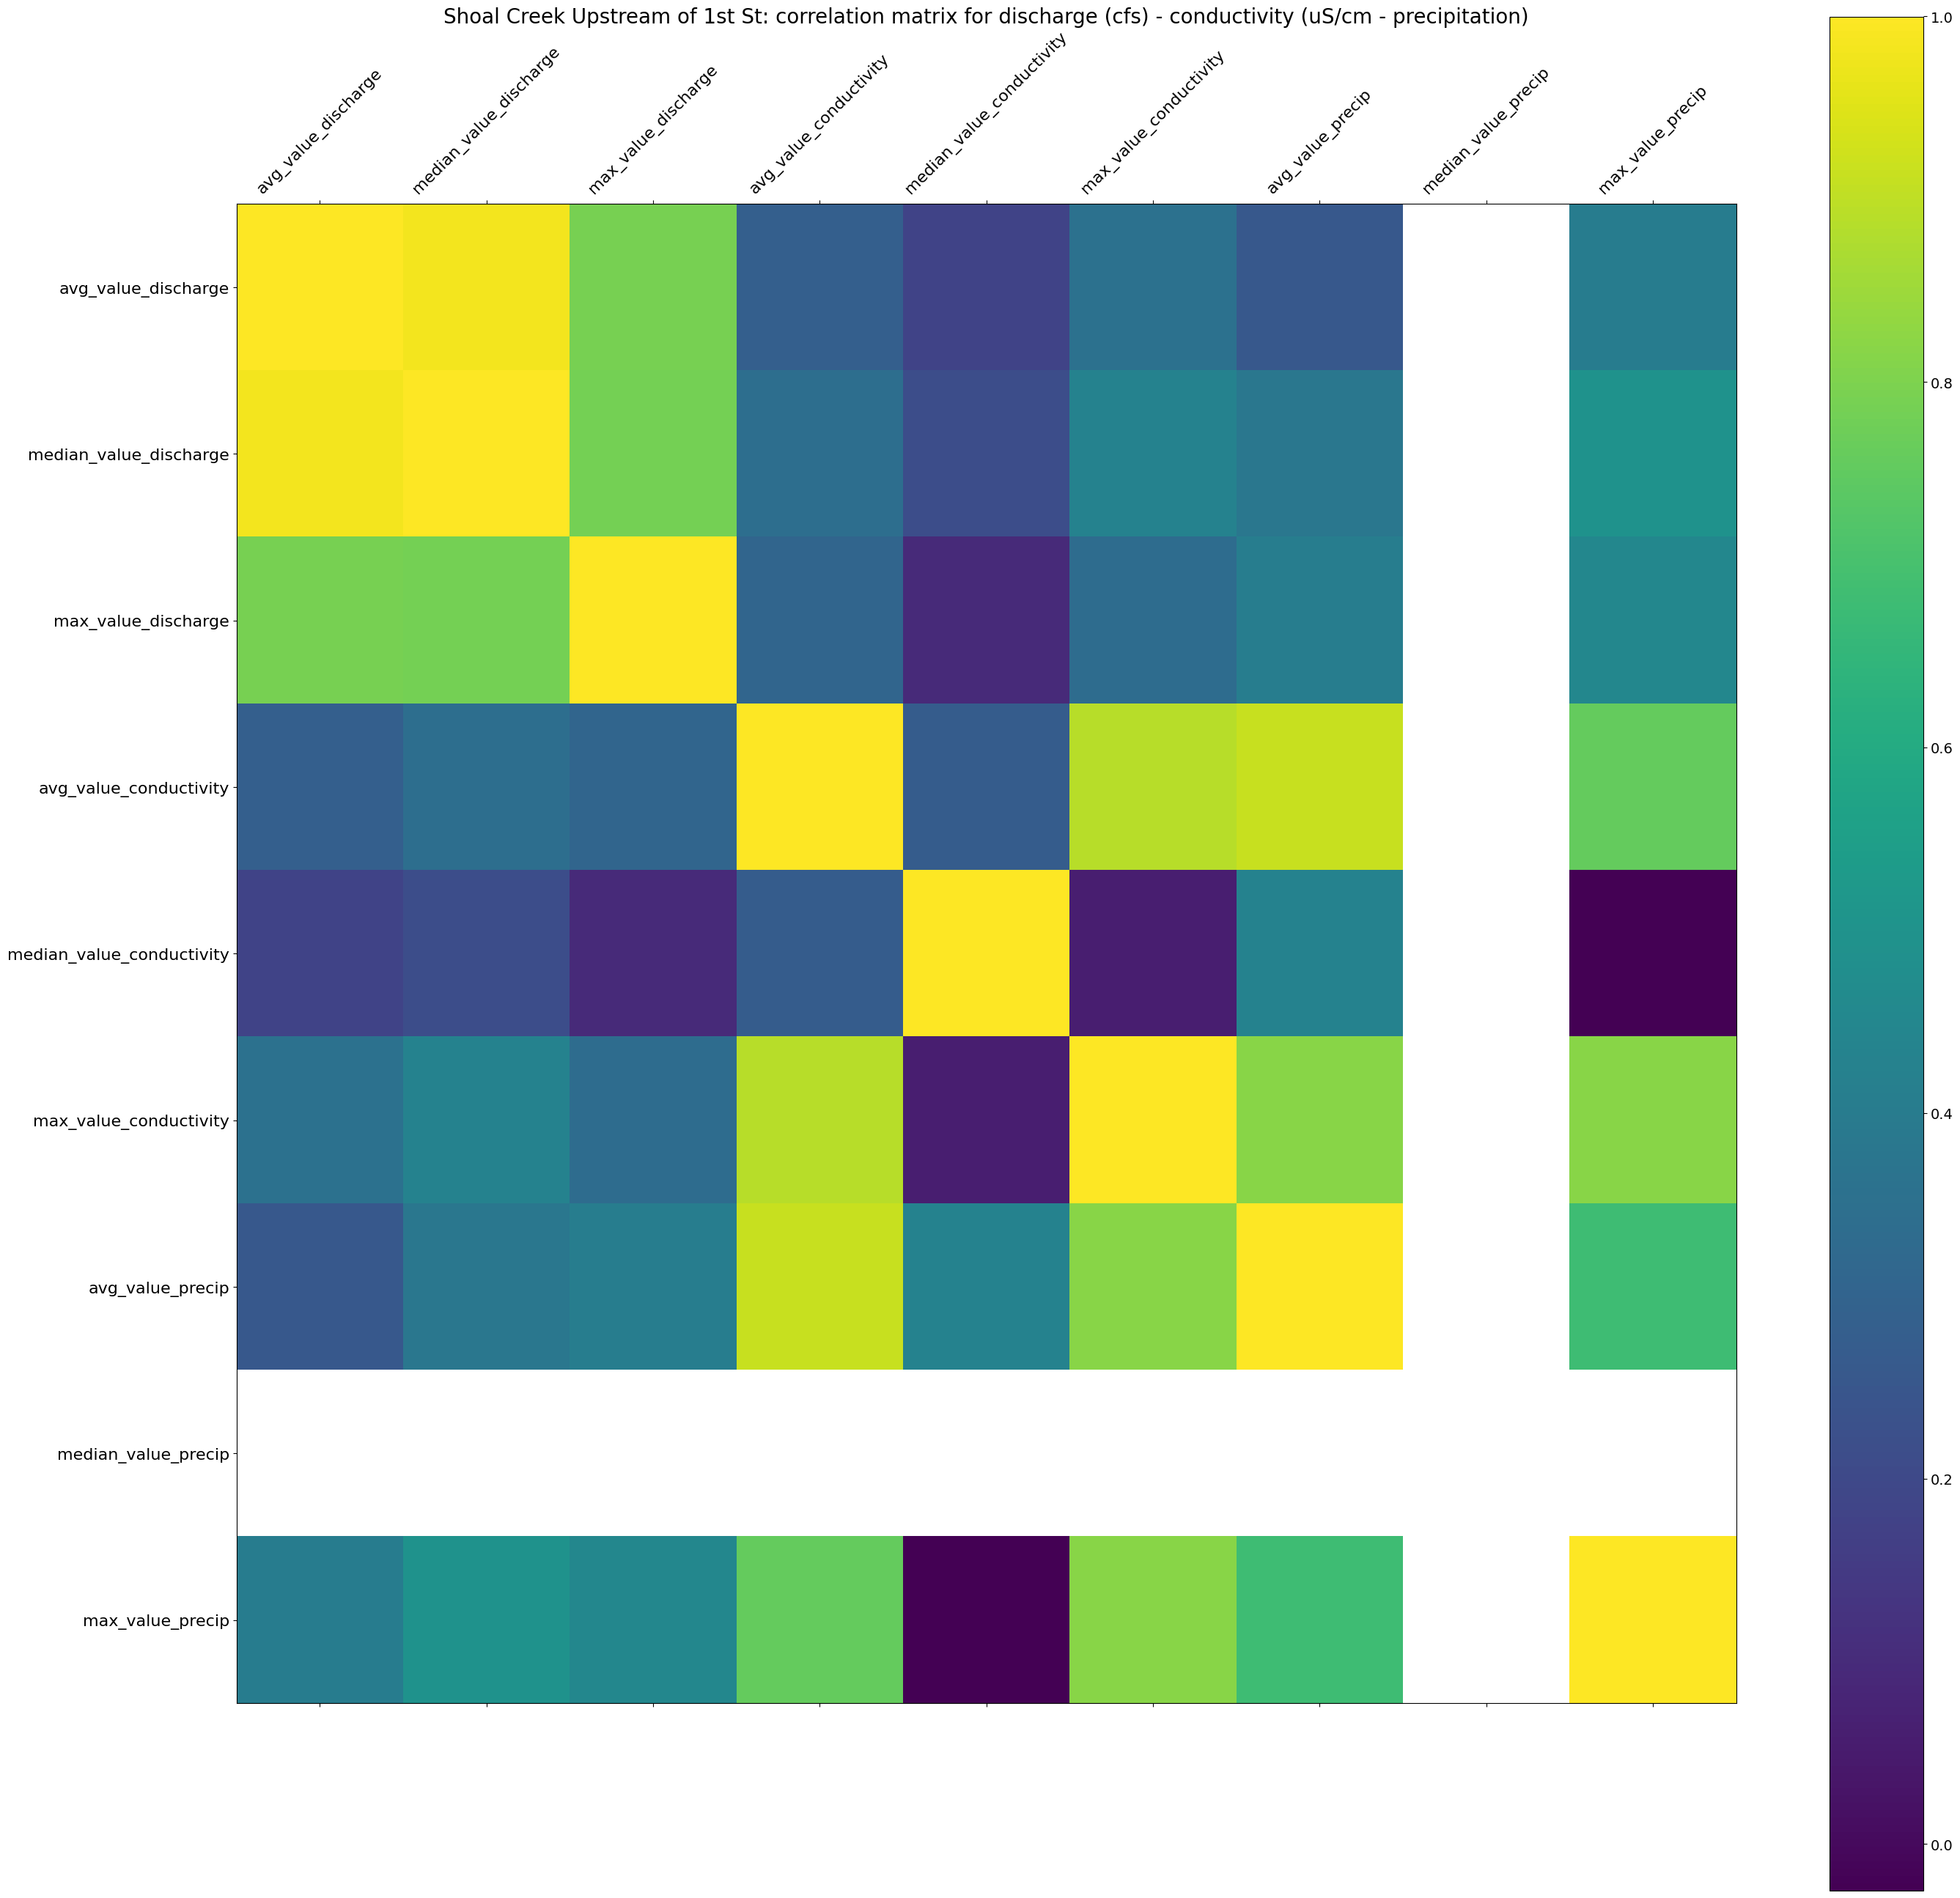

In [47]:
import matplotlib.dates as mdates
from pandas.plotting import scatter_matrix

for location in list(itertools.chain(locations_24th, locations_12th, locations_1st_upstream)):
    for filter_parameter in ['conductivity']:
        precipitation = precipitation_intervals[location][precipitation_intervals[location]["wq_parameter"] == filter_parameter]
        discharge = discharge_intervals[location][discharge_intervals[location]["wq_parameter"] == filter_parameter]
        wq = wq_intervals[location][wq_intervals[location]["parameter"] == filter_parameter]
    
        precipitation_join=precipitation[['start_date', 'avg_value', 'median_value', 'max_value']].set_index("start_date")
    
        discharge_join=discharge[['start_date', 'avg_value', 'median_value', 'max_value']].set_index("start_date")
        

        wq_join=wq[['start_date', 'avg_value', 'median_value', 'max_value']].set_index("start_date")
        
        joined = wq_join.merge(discharge_join, on='start_date', how='left', suffixes = ('_discharge', f'_{filter_parameter}')).merge(precipitation_join, how='left', on='start_date').rename(columns = {'avg_value': 'avg_value_precip', 'median_value': 'median_value_precip', 'max_value': 'max_value_precip'})        

        display(joined.describe())

        display(joined.head(10))

        fig, ax1 = plt.subplots(figsize=(33,33))

        tkw = dict(size=4, width=0.5)

        color = 'tab:red'
        ax1.set_xlabel('intervals (120 days)', fontsize=18)
        ax1.set_ylabel(f'{filter_parameter} ({units[filter_parameter]})', color=color, fontsize=18)
        p1 = ax1.plot(wq["start_date"], wq['avg_value'], color=color)
        ax1.tick_params(axis='y', labelcolor=color, **tkw)
        ax1.tick_params(axis='x', **tkw)

        ax2 = ax1.twinx()

        color = 'tab:blue'
        ax2.set_ylabel('avg discharge (cfs)', color=color, fontsize=18)
        p2 = ax2.plot(discharge["start_date"], discharge['avg_value'], color=color)
        ax2.tick_params(axis='y', labelcolor=color, **tkw)

        ax3 = ax1.twinx()
        ax3.spines.right.set_position(("axes", 1.2))

        color = 'tab:green'
        ax3.set_ylabel('precipitation (in)', color=color, fontsize=18)
        p3 = ax3.plot(precipitation["start_date"], precipitation['avg_value'], color=color)
        ax3.tick_params(axis='y', labelcolor=color, **tkw)

        fig.tight_layout()
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
        plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=120))
        fig.autofmt_xdate()

        plt.title(f'{location}: discharge (cfs) - {filter_parameter} ({units[filter_parameter]}) - precipitation', fontsize=20)
        plt.show()

        scatter_matrix(joined, figsize=(33,33))
        plt.suptitle(f'{location}: discharge (cfs) - {filter_parameter} ({units[filter_parameter]} - precipitation)', fontsize=20)
        plt.xticks(fontsize = 16)
        plt.yticks(fontsize = 16)

        plt.show()

        f = plt.figure(figsize=(33, 33))
        plt.matshow(joined.corr(), fignum=f.number)
        plt.xticks(range(joined.select_dtypes(['number']).shape[1]), joined.select_dtypes(['number']).columns, fontsize=16, rotation=45)
        plt.yticks(range(joined.select_dtypes(['number']).shape[1]), joined.select_dtypes(['number']).columns, fontsize=16)
        cb = plt.colorbar()
        cb.ax.tick_params(labelsize=14)
        plt.title(f'{location}: correlation matrix for discharge (cfs) - {filter_parameter} ({units[filter_parameter]} - precipitation)', fontsize=20)

        display(joined.corr())